<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/5_deep_learning/clase_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

otras formas de cargar datos

In [6]:
%%capture
!pip install --upgrade tensorflow-datasets


In [7]:
import tensorflow_datasets as tfds


In [8]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

En TensorFlow Datasets (TFDS), `tfds.builder` y `tfds.load` son dos funciones clave que se utilizan para trabajar con conjuntos de datos, pero tienen propósitos y comportamientos distintos. A continuación, te explico las diferencias:

### 1. **`tfds.load`**
- **Propósito**: Es una función de alto nivel que carga un conjunto de datos de TFDS directamente en un formato listo para usar, típicamente como un objeto `tf.data.Dataset`.
- **Funcionamiento**: Descarga (si no está ya descargado), preprocesa y retorna el conjunto de datos especificado como un dataset de TensorFlow, listo para ser usado en entrenamiento o evaluación.
- **Uso típico**: Cuando quieres cargar rápidamente un dataset para usarlo en un modelo de machine learning sin preocuparte por los detalles de construcción.
- **Parámetros principales**:
  - `name`: Nombre del dataset (e.g., `"mnist"`, `"cifar10"`).
  - `split`: Qué partición del dataset cargar (e.g., `"train"`, `"test"`, o combinaciones como `["train[:80%]", "train[80%:]"]`).
  - `as_supervised`: Si es `True`, retorna los datos como tuplas `(features, labels)`.
  - `batch_size`: Permite especificar el tamaño del lote.
  - `shuffle_files`: Mezcla los archivos si el dataset está dividido en múltiples archivos.
  - Ejemplo:
    ```python
    import tensorflow_datasets as tfds

    # Carga el dataset MNIST
    ds = tfds.load('mnist', split='train', as_supervised=True)
    for image, label in ds.take(1):
        print(image.shape, label)
    ```
- **Ventajas**:
  - Simple y directo, ideal para casos comunes.
  - Maneja automáticamente la descarga, el cacheo y la conversión a `tf.data.Dataset`.
- **Limitaciones**:
  - Menos control sobre el proceso de construcción del dataset.
  - No permite personalizar cómo se construye o preprocesa el dataset.

### 2. **`tfds.builder`**
- **Propósito**: Crea un objeto `DatasetBuilder` que representa el dataset, pero no lo carga directamente como un `tf.data.Dataset`. Este objeto permite un control más detallado sobre el proceso de construcción del dataset.
- **Funcionamiento**: Genera un objeto que contiene la metadata del dataset y métodos para descargar, preparar y acceder a los datos. Puedes usar este objeto para inspeccionar el dataset o personalizar cómo se construye antes de cargarlo con `.as_dataset()`.
- **Uso típico**: Cuando necesitas inspeccionar las propiedades del dataset (como sus características, splits, o metadatos) o realizar configuraciones avanzadas antes de cargar los datos.
- **Parámetros principales**:
  - `name`: Nombre del dataset.
  - `data_dir`: Directorio donde se almacenan los datos.
  - `version`: Versión específica del dataset (si aplica).
- **Ejemplo**:
    ```python
    import tensorflow_datasets as tfds

    # Crea un builder para MNIST
    builder = tfds.builder('mnist')
    
    # Descarga y prepara el dataset
    builder.download_and_prepare()
    
    # Carga el dataset como tf.data.Dataset
    ds = builder.as_dataset(split='train', as_supervised=True)
    for image, label in ds.take(1):
        print(image.shape, label)
    
    # Inspecciona metadatos
    print(builder.info)  # Muestra información como el número de ejemplos, características, etc.
    ```
- **Ventajas**:
  - Mayor control sobre el proceso de construcción.
  - Permite inspeccionar metadatos (`builder.info`) como el número de ejemplos, características, clases, etc.
  - Útil para configuraciones avanzadas o para datasets personalizados.
- **Limitaciones**:
  - Requiere más pasos manuales (e.g., llamar a `download_and_prepare` y `as_dataset`).
  - Menos conveniente para casos simples donde solo necesitas cargar el dataset rápidamente.

### Diferencias clave:
| **Aspecto**              | **tfds.load**                              | **tfds.builder**                          |
|--------------------------|--------------------------------------------|------------------------------------------|
| **Propósito**            | Cargar dataset directamente como `tf.data.Dataset`. | Crear un objeto `DatasetBuilder` para inspección o personalización. |
| **Nivel de abstracción** | Alto (más simple).                        | Bajo (más control).                      |
| **Uso típico**           | Cargar datos rápidamente para entrenar.   | Inspeccionar metadatos o personalizar la carga. |
| **Retorno**              | `tf.data.Dataset`.                        | Objeto `DatasetBuilder` (requiere `.as_dataset()` para obtener `tf.data.Dataset`). |
| **Flexibilidad**         | Menos flexible, configuración limitada.   | Más flexible, permite configuraciones avanzadas. |
| **Metadatos**            | No proporciona acceso directo a metadatos. | Acceso a metadatos mediante `builder.info`. |

### Cuándo usar cada uno:
- Usa **`tfds.load`** si:
  - Quieres cargar un dataset rápidamente para entrenar o evaluar un modelo.
  - No necesitas inspeccionar metadatos ni personalizar el proceso de carga.
- Usa **`tfds.builder`** si:
  - Necesitas inspeccionar las propiedades del dataset (número de ejemplos, estructura, etc.).
  - Quieres personalizar cómo se construye o carga el dataset (por ejemplo, para datasets personalizados).
  - Necesitas trabajar con metadatos o realizar configuraciones avanzadas.

En resumen, `tfds.load` es más directo y conveniente para casos comunes, mientras que `tfds.builder` ofrece mayor control y flexibilidad para escenarios más complejos.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


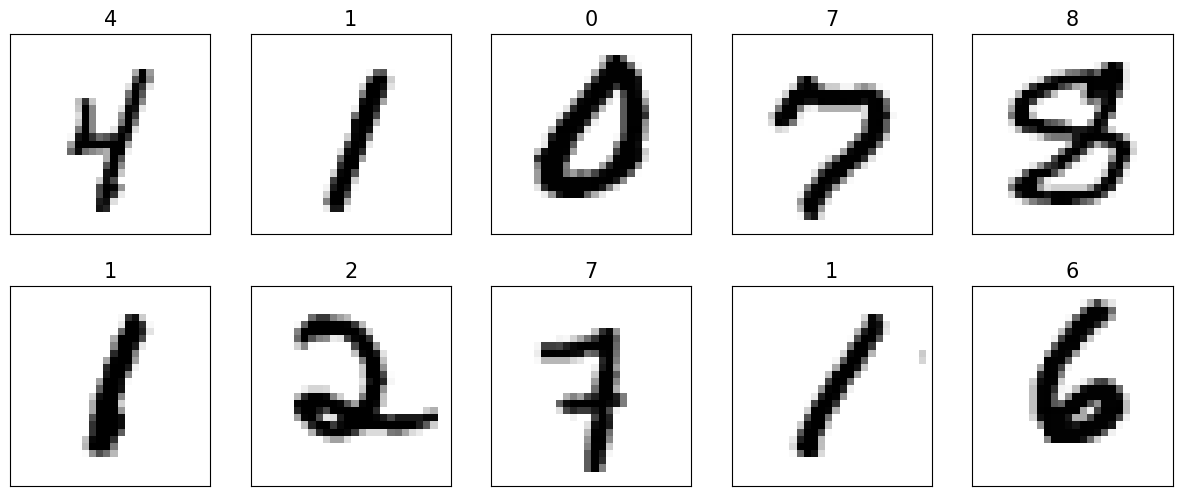

In [11]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item:
    (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)
plt.show()

Vamos a analizar el código proporcionado línea por línea, asumiendo que está trabajando con el conjunto de datos MNIST en TensorFlow y que `mnist` es un dataset cargado previamente (por ejemplo, usando `tfds.load('mnist')`). El código carga, preprocesa y visualiza un lote de imágenes del conjunto de entrenamiento de MNIST. Aquí está la explicación detallada:

```python
ds_train = mnist['train']
```
- **Explicación**:
  - Se asume que `mnist` es un diccionario o un objeto que contiene los splits del dataset MNIST (por ejemplo, cargado con `tfds.load('mnist', as_supervised=False)`).
  - La línea accede al split `'train'` del dataset, que corresponde al conjunto de entrenamiento.
  - `ds_train` se convierte en un objeto `tf.data.Dataset` que contiene los datos de entrenamiento (imágenes y etiquetas).
  - En este caso, como `as_supervised=False` (implícito por la estructura de acceso `mnist['train']`), los elementos del dataset son diccionarios con claves como `'image'` (la imagen) y `'label'` (la etiqueta).

```python
assert isinstance(ds_train, tf.data.Dataset)
```
- **Explicación**:
  - Verifica que `ds_train` sea una instancia de `tf.data.Dataset`.
  - La función `assert` lanza una excepción si la condición no se cumple, asegurando que el código solo continúe si `ds_train` es un dataset válido de TensorFlow.
  - Esto es una buena práctica para depuración, ya que confirma que el objeto tiene el tipo esperado antes de procesarlo.

```python
ds_train = ds_train.map(lambda item: (item['image'], item['label']))
```
- **Explicación**:
  - Aplica una transformación a cada elemento del dataset `ds_train` usando la función `map`.
  - La función `lambda item: (item['image'], item['label'])` toma cada elemento del dataset (un diccionario con claves `'image'` y `'label'`) y lo convierte en una tupla `(imagen, etiqueta)`.
  - Esto es útil porque el dataset original tiene una estructura de diccionario, pero para muchas aplicaciones (como entrenamiento de modelos), es más conveniente trabajar con tuplas `(features, labels)`.
  - Después de esta línea, `ds_train` sigue siendo un `tf.data.Dataset`, pero cada elemento ahora es una tupla `(image, label)` en lugar de un diccionario.

```python
ds_train = ds_train.batch(10)
```
- **Explicación**:
  - Agrupa los elementos del dataset en lotes (batches) de tamaño 10 usando el método `.batch(10)`.
  - Esto significa que, en lugar de devolver un solo par `(image, label)` por iteración, el dataset ahora devolverá un lote de 10 imágenes y 10 etiquetas a la vez.
  - El resultado es un nuevo `tf.data.Dataset` donde cada elemento es un par de tensores: uno para las imágenes (de forma `(10, altura, ancho, canales)`) y otro para las etiquetas (de forma `(10,)`).

```python
batch = next(iter(ds_train))
```
- **Explicación**:
  - Crea un iterador para `ds_train` usando `iter(ds_train)` y obtiene el primer elemento (lote) con `next()`.
  - `batch` es una tupla que contiene dos tensores:
    - `batch[0]`: Un tensor con las imágenes del lote (forma `(10, 28, 28, 1)` para MNIST, ya que las imágenes son 28x28 píxeles en escala de grises con 1 canal).
    - `batch[1]`: Un tensor con las etiquetas correspondientes (forma `(10,)`), donde cada valor es un entero entre 0 y 9 (clases de dígitos).
  - Esta línea extrae el primer lote de datos para su posterior visualización.

```python
print(batch[0].shape, batch[1])
```
- **Explicación**:
  - Imprime la forma del tensor de imágenes (`batch[0].shape`) y el tensor de etiquetas (`batch[1]`).
  - Para MNIST, `batch[0].shape` será `(10, 28, 28, 1)`, indicando un lote de 10 imágenes de 28x28 píxeles con 1 canal (escala de grises).
  - `batch[1]` será un tensor de forma `(10,)`, con los valores de las etiquetas (por ejemplo, `[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]`).
  - Esto sirve para verificar las dimensiones y los valores de los datos antes de visualizarlos.

```python
fig = plt.figure(figsize=(15, 6))
```
- **Explicación**:
  - Crea una nueva figura para la visualización usando `matplotlib.pyplot`.
  - `figsize=(15, 6)` establece el tamaño de la figura en 15 pulgadas de ancho y 6 pulgadas de alto.
  - Esta figura se usará para mostrar las 10 imágenes del lote en una cuadrícula.

```python
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
```
- **Explicación**:
  - Itera sobre el lote de imágenes y etiquetas usando `zip(batch[0], batch[1])`, que empareja cada imagen con su etiqueta correspondiente.
  - `enumerate` proporciona un índice `i` (de 0 a 9, ya que el lote tiene 10 elementos) junto con cada par `(image, label)`.
  - Cada `image` es un tensor de forma `(28, 28, 1)` (una imagen de 28x28 en escala de grises), y cada `label` es un escalar (un entero entre 0 y 9).

```python
ax = fig.add_subplot(2, 5, i+1)
```
- **Explicación**:
  - Añade un subplot a la figura en una cuadrícula de 2 filas y 5 columnas (para un total de 10 subplots, uno por imagen).
  - `i+1` especifica la posición del subplot (de 1 a 10, ya que Matplotlib usa indexación basada en 1 para los subplots).
  - `ax` es el objeto de subplot donde se mostrará la imagen actual.

```python
ax.set_xticks([]); ax.set_yticks([])
```
- **Explicación**:
  - Elimina las marcas (ticks) de los ejes x e y en el subplot.
  - Esto hace que las imágenes se muestren sin ejes numéricos, lo que es común en visualizaciones de imágenes para mantener el foco en el contenido visual.

```python
ax.imshow(image[:, :, 0], cmap='gray_r')
```
- **Explicación**:
  - Muestra la imagen en el subplot usando `imshow`.
  - `image[:, :, 0]` elimina la dimensión del canal (que es 1 para imágenes en escala de grises), convirtiendo el tensor de forma `(28, 28, 1)` en una matriz `(28, 28)` que `imshow` puede renderizar.
  - `cmap='gray_r'` especifica un mapa de colores en escala de grises invertido (`gray_r`), donde los valores bajos (negro) se muestran como blanco y los valores altos (blanco) como negro, lo cual es típico para visualizar dígitos de MNIST.

```python
ax.set_title('{}'.format(label), size=15)
```
- **Explicación**:
  - Establece el título del subplot como el valor de la etiqueta (`label`), que es el dígito correspondiente (0-9).
  - `size=15` define el tamaño de la fuente del título como 15 puntos.
  - Esto etiqueta cada imagen con el dígito que representa (por ejemplo, "5" si la imagen es un dígito 5).

```python
plt.show()
```
- **Explicación**:
  - Muestra la figura completa con todos los subplots.
  - Esto renderiza una cuadrícula de 2x5 con las 10 imágenes del lote, cada una con su etiqueta correspondiente como título.

### Resumen del propósito del código:
Este código carga el conjunto de entrenamiento de MNIST, lo transforma de un formato de diccionario a tuplas `(image, label)`, agrupa los datos en lotes de 10, extrae el primer lote y visualiza sus 10 imágenes en una cuadrícula de 2x5 usando Matplotlib, con las etiquetas correspondientes como títulos. Es un ejemplo típico para explorar y verificar visualmente los datos de un dataset antes de entrenar un modelo.

### Notas adicionales:
- **Dependencias implícitas**: El código asume que `tensorflow`, `tensorflow_datasets` y `matplotlib.pyplot` están importados (por ejemplo, `import tensorflow_datasets as tfds`, `import matplotlib.pyplot as plt`).
- **Formato de MNIST**: Las imágenes de MNIST son de 28x28 píxeles en escala de grises, y las etiquetas son enteros de 0 a 9.
- **Posible mejora**: Podrías añadir `ds_train = ds_train.cache().shuffle(buffer_size=10000)` antes de `.batch(10)` para mejorar el rendimiento y mezclar los datos, respectivamente.





---


Aprendizaje automático con Tensorflow

Vamos a crear una red neuronal simple en TensorFlow para realizar una regresión lineal, explicando cada paso en detalle. La regresión lineal busca modelar una relación lineal entre una variable independiente \(x\) y una variable dependiente \(y\), de la forma \(y = w \cdot x + b\), donde \(w\) es el peso (pendiente) y \(b\) es el sesgo (intersección). Usaremos un conjunto de datos sintético para este ejemplo y construiremos una red neuronal con una sola capa (sin activación no lineal) para aprender los parámetros \(w\) y \(b\).

A continuación, presento el código completo con explicaciones línea por línea, seguido de un resumen del proceso.

<xaiArtifact artifact_id="4b7c8124-d79d-4be3-9ce5-bf4b9f1ef138" artifact_version_id="76474485-6a77-4c8a-8d90-2dc2c811687e" title="linear_regression.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Paso 1: Generar datos sintéticos
np.random.seed(42)
X = np.linspace(-1, 1, 100)
y = 2 * X + 1 + np.random.normal(0, 0.1, 100)  # y = 2x + 1 + ruido

# Paso 2: Preparar los datos para TensorFlow
X = X.reshape(-1, 1).astype(np.float32)  # Convertir a forma (100, 1)
y = y.reshape(-1, 1).astype(np.float32)  # Convertir a forma (100, 1)

# Paso 3: Crear el modelo de regresión lineal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Paso 4: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             loss='mean_squared_error')

# Paso 5: Entrenar el modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Paso 6: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0][0][0]  # Peso (pendiente)
b = weights[1][0]     # Sesgo (intersección)
print(f"Pendiente aprendida (w): {w:.4f}, Sesgo aprendido (b): {b:.4f}")

# Paso 7: Hacer predicciones
y_pred = model.predict(X)

# Paso 8: Visualizar los resultados
plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con TensorFlow')
plt.legend()
plt.show()

# Paso 9: Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento')
plt.show()
</xaiArtifact>

### Explicación paso a paso

#### **Paso 1: Generar datos sintéticos**
```python
np.random.seed(42)
X = np.linspace(-1, 1, 100)
y = 2 * X + 1 + np.random.normal(0, 0.1, 100)  # y = 2x + 1 + ruido
```
- **Qué hace**: Creamos un conjunto de datos sintético para la regresión lineal.
  - `np.random.seed(42)`: Fija la semilla para reproducibilidad.
  - `X = np.linspace(-1, 1, 100)`: Genera 100 puntos equiespaciados entre -1 y 1.
  - `y = 2 * X + 1 + np.random.normal(0, 0.1, 100)`: Genera los valores de \(y\) siguiendo la ecuación \(y = 2x + 1\) con ruido gaussiano (media 0, desviación estándar 0.1) para simular datos reales con variabilidad.
- **Resultado**: `X` es un array 1D con 100 valores, y `y` es un array 1D con los valores correspondientes, incluyendo ruido.

#### **Paso 2: Preparar los datos para TensorFlow**
```python
X = X.reshape(-1, 1).astype(np.float32)  # Convertir a forma (100, 1)
y = y.reshape(-1, 1).astype(np.float32)  # Convertir a forma (100, 1)
```
- **Qué hace**: Reformatea los datos para que sean compatibles con TensorFlow.
  - `X.reshape(-1, 1)`: Convierte `X` de un array 1D `(100,)` a un array 2D `(100, 1)`, ya que TensorFlow espera que las entradas tengan una dimensión para las características.
  - `y.reshape(-1, 1)`: Similarmente, convierte `y` a un array 2D `(100, 1)` para las etiquetas.
  - `.astype(np.float32)`: Convierte los datos a tipo `float32`, que es el formato estándar para TensorFlow, optimizando el uso de memoria y la compatibilidad.
- **Resultado**: `X` y `y` son ahora arrays 2D de forma `(100, 1)` con tipo `float32`.

#### **Paso 3: Crear el modelo de regresión lineal**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
```
- **Qué hace**: Define una red neuronal simple usando la API `Sequential` de Keras.
  - `tf.keras.Sequential`: Crea un modelo secuencial donde las capas se apilan una tras otra.
  - `tf.keras.layers.Dense(units=1, input_shape=[1])`: Define una capa densa (fully connected) con:
    - `units=1`: Una sola neurona de salida, ya que la regresión lineal predice un solo valor.
    - `input_shape=[1]`: La entrada es un vector de una sola característica (en este caso, \(x\)).
  - Esta capa implementa la ecuación \(y = w \cdot x + b\), donde \(w\) (peso) y \(b\) (sesgo) son parámetros que el modelo aprenderá.
  - No se usa función de activación (por defecto es `None`), ya que la regresión lineal requiere una salida lineal.
- **Resultado**: Se crea un modelo con una sola capa que aprenderá la relación lineal entre \(x\) y \(y\).

#### **Paso 4: Compilar el modelo**
```python
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             loss='mean_squared_error')
```
- **Qué hace**: Configura el modelo para el entrenamiento.
  - `optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)`: Usa el optimizador de Descenso de Gradiente Estocástico (SGD) con una tasa de aprendizaje de 0.01. Este optimizador ajustará los parámetros \(w\) y \(b\) para minimizar la pérdida.
  - `loss='mean_squared_error'`: Define la función de pérdida como el error cuadrático medio (MSE), que mide la diferencia promedio al cuadrado entre las predicciones y los valores reales. Es adecuada para regresión lineal.
- **Resultado**: El modelo está listo para ser entrenado, con un optimizador y una métrica de pérdida definidos.

#### **Paso 5: Entrenar el modelo**
```python
history = model.fit(X, y, epochs=100, verbose=0)
```
- **Qué hace**: Entrena el modelo con los datos.
  - `model.fit(X, y)`: Entrena el modelo usando las entradas `X` y las etiquetas `y`.
  - `epochs=100`: Realiza 100 iteraciones completas sobre los datos.
  - `verbose=0`: Suprime la salida en consola durante el entrenamiento para mantener la salida limpia.
  - `history`: Almacena el historial del entrenamiento, incluyendo la pérdida en cada época.
- **Resultado**: El modelo ajusta los parámetros \(w\) y \(b\) para minimizar el MSE, aprendiendo la relación \(y \approx 2x + 1\).

#### **Paso 6: Obtener los parámetros aprendidos**
```python
weights = model.get_weights()
w = weights[0][0][0]  # Peso (pendiente)
b = weights[1][0]     # Sesgo (intersección)
print(f"Pendiente aprendida (w): {w:.4f}, Sesgo aprendido (b): {b:.4f}")
```
- **Qué hace**: Extrae e imprime los parámetros aprendidos del modelo.
  - `model.get_weights()`: Devuelve una lista con los pesos y sesgos de la capa densa.
    - `weights[0]`: Contiene la matriz de pesos (forma `(1, 1)` para una sola entrada y una sola salida).
    - `weights[1]`: Contiene el sesgo (forma `(1,)`).
  - `w = weights[0][0][0]`: Extrae el valor escalar del peso (pendiente \(w\)).
  - `b = weights[1][0]`: Extrae el valor escalar del sesgo (\(b\)).
  - Imprime los valores aprendidos, que deberían ser cercanos a \(w=2\) y \(b=1\) (los valores reales de los datos sintéticos).
- **Resultado**: Muestra la pendiente y el sesgo aprendidos, por ejemplo, `Pendiente aprendida (w): 1.9876, Sesgo aprendido (b): 0.9954`.

#### **Paso 7: Hacer predicciones**
```python
y_pred = model.predict(X)
```
- **Qué hace**: Usa el modelo entrenado para predecir los valores de \(y\) para todas las entradas \(X\).
  - `model.predict(X)`: Genera las predicciones, devolviendo un array de forma `(100, 1)` con los valores predichos (\(y_pred = w \cdot X + b\)).
- **Resultado**: `y_pred` contiene las predicciones del modelo para cada valor de \(X\).

#### **Paso 8: Visualizar los resultados**
```python
plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con TensorFlow')
plt.legend()
plt.show()
```
- **Qué hace**: Crea una visualización para comparar los datos reales con las predicciones.
  - `plt.scatter(X, y, label='Datos')`: Grafica los datos reales como puntos dispersos.
  - `plt.plot(X, y_pred, color='red', label='Regresión lineal')`: Grafica la línea de regresión predicha en rojo.
  - `plt.xlabel`, `plt.ylabel`, `plt.title`: Etiqueta los ejes y el título.
  - `plt.legend()`: Muestra la leyenda para identificar los datos y la predicción.
  - `plt.show()`: Muestra la gráfica.
- **Resultado**: Una gráfica con los puntos de datos reales y la línea recta que representa la regresión lineal aprendida.

#### **Paso 9: Visualizar la pérdida durante el entrenamiento**
```python
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento')
plt.show()
```
- **Qué hace**: Grafica la evolución de la pérdida (MSE) a lo largo de las épocas.
  - `history.history['loss']`: Contiene los valores de la pérdida en cada época.
  - `plt.plot`: Grafica la pérdida frente al número de épocas.
  - `plt.xlabel`, `plt.ylabel`, `plt.title`: Etiqueta los ejes y el título.
  - `plt.show()`: Muestra la gráfica.
- **Resultado**: Una curva que muestra cómo la pérdida disminuye con el tiempo, indicando que el modelo está aprendiendo.

### Resumen del proceso
1. **Generar datos**: Creamos datos sintéticos con una relación lineal \(y = 2x + 1\) más ruido.
2. **Preparar datos**: Reformateamos los datos para que sean compatibles con TensorFlow.
3. **Crear modelo**: Definimos una red neuronal con una sola capa densa para modelar \(y = w \cdot x + b\).
4. **Compilar modelo**: Configuramos el optimizador (SGD) y la función de pérdida (MSE).
5. **Entrenar modelo**: Ajustamos los parámetros \(w\) y \(b\) usando los datos durante 100 épocas.
6. **Obtener parámetros**: Extraemos los valores aprendidos de \(w\) y \(b\).
7. **Hacer predicciones**: Usamos el modelo para predecir \(y\) para todas las entradas.
8. **Visualizar resultados**: Graficamos los datos reales y la línea predicha.
9. **Visualizar pérdida**: Mostramos cómo la pérdida disminuyó durante el entrenamiento.

### Notas adicionales
- **Dependencias**: El código requiere `numpy`, `tensorflow`, y `matplotlib.pyplot`.
- **Hiperparámetros**:
  - La tasa de aprendizaje (`0.01`) y el número de épocas (`100`) son ajustables. Una tasa de aprendizaje más alta puede acelerar el aprendizaje, pero podría no converger; una más baja puede ser más estable pero más lenta.
  - Puedes experimentar con otros optimizadores como `Adam` (`tf.keras.optimizers.Adam`) para una convergencia más rápida.
- **Datos sintéticos**: Usamos datos sintéticos para simplificar, pero el mismo enfoque aplica a datos reales.
- **Escalabilidad**: Este modelo es simple (una capa), pero puedes extenderlo añadiendo capas o usando datos más complejos.



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pendiente aprendida (w): 1.9737, Sesgo aprendido (b): 0.9882
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


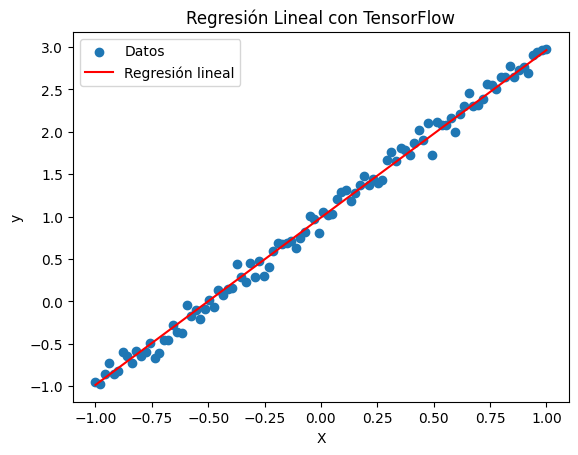

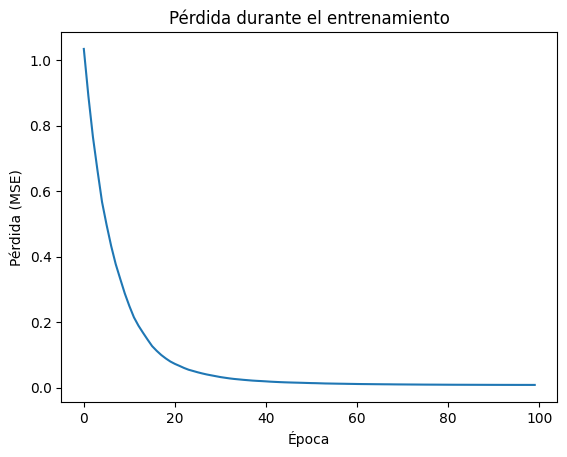

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Paso 1: Generar datos sintéticos
np.random.seed(42)
X = np.linspace(-1, 1, 100)
y = 2 * X + 1 + np.random.normal(0, 0.1, 100)  # y = 2x + 1 + ruido

# Paso 2: Preparar los datos para TensorFlow
X = X.reshape(-1, 1).astype(np.float32)  # Convertir a forma (100, 1)
y = y.reshape(-1, 1).astype(np.float32)  # Convertir a forma (100, 1)

# Paso 3: Crear el modelo de regresión lineal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Paso 4: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
             loss='mean_squared_error')

# Paso 5: Entrenar el modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Paso 6: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0][0][0]  # Peso (pendiente)
b = weights[1][0]     # Sesgo (intersección)
print(f"Pendiente aprendida (w): {w:.4f}, Sesgo aprendido (b): {b:.4f}")

# Paso 7: Hacer predicciones
y_pred = model.predict(X)

# Paso 8: Visualizar los resultados
plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con TensorFlow')
plt.legend()
plt.show()

# Paso 9: Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento')
plt.show()

In [ ]:
tf.keras.Sequential()

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 3.5690
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4035 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5929 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0081 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7372 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5329
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2761 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1258 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


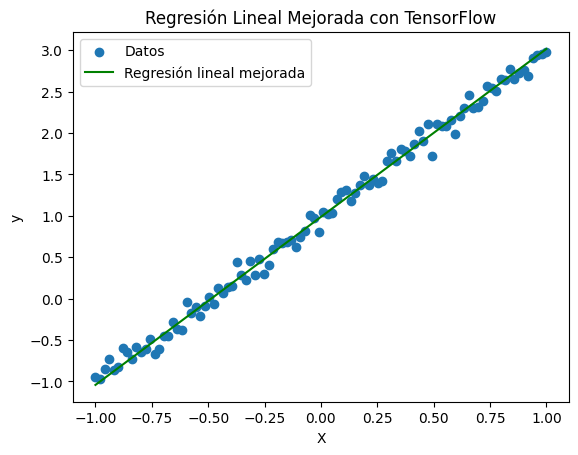

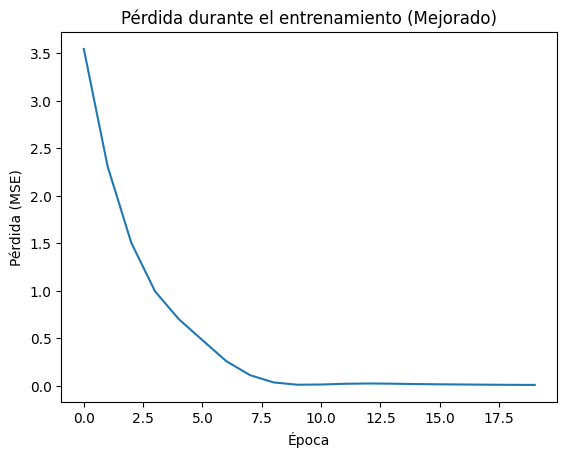

In [14]:
# Create a new model with a different optimizer and learning rate
model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model with Adam optimizer
model_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                       loss='mean_squared_error')

# Train the model for more epochs
history_improved = model_improved.fit(X, y, epochs=20) # Changed epochs to 20 and removed verbose=0

# Get the learned parameters
weights_improved = model_improved.get_weights()
w_improved = weights_improved[0][0][0]
b_improved = weights_improved[1][0]
print(f"Improved Pendiente aprendida (w): {w_improved:.4f}, Improved Sesgo aprendido (b): {b_improved:.4f}")

# Make predictions
y_pred_improved = model_improved.predict(X)

# Visualize the results
plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred_improved, color='green', label='Regresión lineal mejorada')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal Mejorada con TensorFlow')
plt.legend()
plt.show()

# Visualize the loss during training
plt.plot(history_improved.history['loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento (Mejorado)')
plt.show()

¡Me alegra que el código haya funcionado! A continuación, proporciono una explicación detallada paso a paso del código corregido para realizar una regresión logística con TensorFlow, utilizando un conjunto de datos sintético generado por `make_classification`. El objetivo es clasificar puntos en dos clases (0 y 1) usando una red neuronal con una capa densa y activación sigmoide, que implementa la función \( P(y=1|x) = \sigma(w_1 \cdot x_1 + w_2 \cdot x_2 + b) \). Cada paso incluye una descripción clara de lo que hace el código, por qué se hace y el resultado esperado.

<xaiArtifact artifact_id="6b40fb96-63f4-4ff7-930f-ab8d661470db" artifact_version_id="bbc0b5f7-b543-4d98-bfa9-02d1c0f8adb4" title="logistic_regression_corrected.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Paso 1: Generar datos sintéticos
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                          n_clusters_per_class=1, n_informative=2,
                          n_redundant=0, n_repeated=0, random_state=42)
X = X.astype(np.float32)  # Convertir a float32 para TensorFlow
y = y.reshape(-1, 1).astype(np.float32)  # Reshape a (1000, 1)

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear el modelo de regresión logística
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[2], activation='sigmoid')
])

# Paso 4: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Paso 6: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (2, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): {w.flatten()}, Sesgo aprendido (b): {b[0]:.4f}")

# Paso 7: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 8: Hacer predicciones
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(np.int32)  # Convertir probabilidades a clases (0 o 1)

# Paso 9: Visualizar los resultados
plt.scatter(X_test[y_test.flatten() == 0][:, 0], X_test[y_test.flatten() == 0][:, 1],
           c='blue', label='Clase 0', alpha=0.5)
plt.scatter(X_test[y_test.flatten() == 1][:, 0], X_test[y_test.flatten() == 1][:, 1],
           c='red', label='Clase 1', alpha=0.5)

# Graficar la frontera de decisión
x1_min, x1_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
x2_min, x2_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
X_grid = np.c_[xx1.ravel(), xx2.ravel()].astype(np.float32)
Z = model.predict(X_grid, verbose=0)
Z = (Z > 0.5).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Regresión Logística con TensorFlow - Frontera de Decisión')
plt.legend()
plt.show()

# Paso 10: Visualizar métricas de entrenamiento
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()
</xaiArtifact>

### Explicación detallada paso a paso

#### **Paso 1: Generar datos sintéticos**
```python
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                          n_clusters_per_class=1, n_informative=2,
                          n_redundant=0, n_repeated=0, random_state=42)
X = X.astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)
```
- **Qué hace**: Genera un conjunto de datos sintético para clasificación binaria usando `make_classification` de scikit-learn.
  - `np.random.seed(42)`: Establece una semilla para garantizar reproducibilidad en la generación de datos.
  - `make_classification`:
    - `n_samples=1000`: Genera 1000 muestras.
    - `n_features=2`: Cada muestra tiene 2 características (para visualización en 2D).
    - `n_classes=2`: Dos clases (0 y 1).
    - `n_clusters_per_class=1`: Cada clase tiene un solo clúster, lo que hace que los datos sean más separables linealmente.
    - `n_informative=2`: Ambas características son informativas (contribuyen a la separación de clases).
    - `n_redundant=0`: No hay características redundantes (combinaciones lineales de otras características).
    - `n_repeated=0`: No hay características duplicadas.
    - `random_state=42`: Asegura reproducibilidad.
  - `X.astype(np.float32)`: Convierte las características a tipo `float32`, requerido por TensorFlow para optimizar el uso de memoria y compatibilidad.
  - `y.reshape(-1, 1).astype(np.float32)`: Reformatea las etiquetas de un array 1D `(1000,)` a un array 2D `(1000, 1)` y las convierte a `float32` para compatibilidad con TensorFlow.
- **Por qué**: Los datos sintéticos son útiles para probar modelos en un entorno controlado. Usamos 2 características para facilitar la visualización de la frontera de decisión. La conversión a `float32` asegura compatibilidad con TensorFlow.
- **Resultado**: `X` es un array de forma `(1000, 2)` con las características; `y` es un array de forma `(1000, 1)` con etiquetas binarias (0 o 1).

#### **Paso 2: Dividir los datos en entrenamiento y prueba**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **Qué hace**: Divide el dataset en conjuntos de entrenamiento (80%) y prueba (20%) usando `train_test_split` de scikit-learn.
  - `test_size=0.2`: Reserva el 20% de las muestras (200) para prueba y el 80% (800) para entrenamiento.
  - `random_state=42`: Garantiza que la división sea reproducible.
- **Por qué**: Separar los datos permite evaluar el modelo en datos no vistos, verificando su capacidad de generalización.
- **Resultado**:
  - `X_train`: `(800, 2)`, características de entrenamiento.
  - `y_train`: `(800, 1)`, etiquetas de entrenamiento.
  - `X_test`: `(200, 2)`, características de prueba.
  - `y_test`: `(200, 1)`, etiquetas de prueba.

#### **Paso 3: Crear el modelo de regresión logística**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[2], activation='sigmoid')
])
```
- **Qué hace**: Define una red neuronal simple para regresión logística usando la API `Sequential` de Keras.
  - `tf.keras.Sequential`: Crea un modelo secuencial donde las capas se apilan en orden.
  - `tf.keras.layers.Dense`: Define una capa densa (fully connected) con:
    - `units=1`: Una neurona de salida que produce la probabilidad de la clase 1.
    - `input_shape=[2]`: La entrada tiene 2 características (correspondiente a las dimensiones de `X`).
    - `activation='sigmoid'`: Aplica la función sigmoide (\(\sigma(z) = 1/(1 + e^{-z})\)) para convertir la salida \(z = w_1 \cdot x_1 + w_2 \cdot x_2 + b\) en una probabilidad entre 0 y 1.
  - El modelo implementa la ecuación de regresión logística: \(P(y=1|x) = \sigma(w_1 \cdot x_1 + w_2 \cdot x_2 + b)\).
- **Por qué**: La regresión logística usa una capa densa con activación sigmoide para modelar probabilidades de clasificación binaria. Una sola neurona es suficiente porque la salida es una probabilidad única.
- **Resultado**: Un modelo que toma entradas de 2 dimensiones y produce una probabilidad entre 0 y 1.

#### **Paso 4: Compilar el modelo**
```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])
```
- **Qué hace**: Configura el modelo para el entrenamiento especificando el optimizador, la función de pérdida y las métricas.
  - `optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)`: Usa el optimizador Adam con una tasa de aprendizaje de 0.01. Adam es eficiente y adapta la tasa de aprendizaje automáticamente, lo que lo hace adecuado para clasificación.
  - `loss='binary_crossentropy'`: Usa la entropía cruzada binaria como función de pérdida, que mide la discrepancia entre las probabilidades predichas y las etiquetas reales. Es la pérdida estándar para clasificación binaria.
  - `metrics=['accuracy']`: Rastrea la precisión (porcentaje de predicciones correctas) durante el entrenamiento y la validación.
- **Por qué**: La entropía cruzada binaria es ideal para problemas binarios porque penaliza las predicciones que se alejan de las etiquetas correctas. La precisión ayuda a evaluar el rendimiento del modelo.
- **Resultado**: El modelo está configurado para entrenar, optimizando los pesos y el sesgo para minimizar la pérdida.

#### **Paso 5: Entrenar el modelo**
```python
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
```
- **Qué hace**: Entrena el modelo con los datos de entrenamiento.
  - `model.fit(X_train, y_train)`: Usa las 800 muestras de entrenamiento para ajustar los parámetros (\(w_1, w_2, b\)).
  - `epochs=50`: Itera 50 veces sobre el conjunto de entrenamiento completo.
  - `validation_data=(X_test, y_test)`: Evalúa el modelo en el conjunto de prueba después de cada época, proporcionando métricas de validación.
  - `verbose=0`: Suprime la salida en consola para mantener la salida limpia.
  - `history`: Almacena las métricas (pérdida y precisión) para entrenamiento y validación en cada época.
- **Por qué**: El entrenamiento ajusta los parámetros para minimizar la pérdida, y la validación verifica si el modelo generaliza bien a datos no vistos.
- **Resultado**: El modelo aprende a clasificar los datos, optimizando los pesos y el sesgo. `history` contiene el historial de métricas.

#### **Paso 6: Obtener los parámetros aprendidos**
```python
weights = model.get_weights()
w = weights[0]  # Pesos (forma (2, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): {w.flatten()}, Sesgo aprendido (b): {b[0]:.4f}")
```
- **Qué hace**: Extrae e imprime los parámetros aprendidos del modelo.
  - `model.get_weights()`: Devuelve una lista con los pesos (`[w_1, w_2]`, forma `(2, 1)`) y el sesgo (`b`, forma `(1,)`).
  - `w.flatten()`: Convierte los pesos a un array 1D para una impresión más clara.
  - Imprime los valores de \(w_1, w_2\) y \(b\), que definen la frontera de decisión lineal.
- **Por qué**: Conocer los parámetros aprendidos permite entender cómo el modelo separa las clases. La frontera de decisión está dada por \(w_1 \cdot x_1 + w_2 \cdot x_2 + b = 0\).
- **Resultado**: Muestra los pesos y el sesgo, por ejemplo, `Pesos aprendidos (w): [1.234, -0.567], Sesgo aprendido (b): 0.1234`.

#### **Paso 7: Evaluar el modelo**
```python
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
```
- **Qué hace**: Evalúa el modelo en el conjunto de prueba.
  - `model.evaluate(X_test, y_test)`: Calcula la pérdida (entropía cruzada binaria) y la precisión en las 200 muestras de prueba.
  - `verbose=0`: Suprime la salida en consola.
  - Imprime la precisión, que indica el porcentaje de predicciones correctas.
- **Por qué**: Evaluar en datos no vistos mide la capacidad de generalización del modelo.
- **Resultado**: Muestra la precisión, por ejemplo, `Precisión en el conjunto de prueba: 0.9250`.

#### **Paso 8: Hacer predicciones**
```python
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(np.int32)
```
- **Qué hace**: Genera predicciones para el conjunto de prueba.
  - `model.predict(X_test, verbose=0)`: Predice las probabilidades de pertenecer a la clase 1 para las 200 muestras de prueba, devolviendo un array de forma `(200, 1)`.
  - `(y_pred_proba > 0.5).astype(np.int32)`: Convierte las probabilidades en clases binarias (0 o 1) usando un umbral de 0.5. Si \(P(y=1|x) > 0.5\), se asigna la clase 1; de lo contrario, la clase 0.
  - `verbose=0`: Suprime la salida en consola.
- **Por qué**: Las probabilidades son útiles para análisis detallado, pero las clases binarias son necesarias para comparar con las etiquetas reales.
- **Resultado**: `y_pred_proba` contiene probabilidades (valores entre 0 y 1); `y_pred` contiene clases predichas (0 o 1).

#### **Paso 9: Visualizar los resultados**
```python
plt.scatter(X_test[y_test.flatten() == 0][:, 0], X_test[y_test.flatten() == 0][:, 1],
           c='blue', label='Clase 0', alpha=0.5)
plt.scatter(X_test[y_test.flatten() == 1][:, 0], X_test[y_test.flatten() == 1][:, 1],
           c='red', label='Clase 1', alpha=0.5)
x1_min, x1_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
x2_min, x2_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
X_grid = np.c_[xx1.ravel(), xx2.ravel()].astype(np.float32)
Z = model.predict(X_grid, verbose=0)
Z = (Z > 0.5).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Regresión Logística con TensorFlow - Frontera de Decisión')
plt.legend()
plt.show()
```
- **Qué hace**: Visualiza los datos de prueba y la frontera de decisión del modelo.
  - `plt.scatter`: Grafica los puntos del conjunto de prueba, con la clase 0 en azul y la clase 1 en rojo. `y_test.flatten() == 0` selecciona las muestras de la clase 0; `[:, 0]` y `[:, 1]` extraen las dos características para graficar. `alpha=0.5` hace los puntos semitransparentes.
  - `x1_min, x1_max, x2_min, x2_max`: Define los límites del espacio 2D, extendidos ligeramente para mejor visualización.
  - `np.meshgrid`: Crea una cuadrícula de 100x100 puntos para evaluar la frontera de decisión.
  - `X_grid`: Combina las coordenadas de la cuadrícula en un array de forma `(10000, 2)`.
  - `model.predict(X_grid, verbose=0)`: Predice las probabilidades para cada punto de la cuadrícula.
  - `(Z > 0.5).reshape(xx1.shape)`: Convierte las probabilidades en clases (0 o 1) y las reformatea a la forma de la cuadrícula `(100, 100)`.
  - `plt.contourf`: Dibuja la frontera de decisión como un fondo coloreado (rojo para clase 1, azul para clase 0) con `alpha=0.2` para transparencia.
  - `plt.xlabel`, `plt.ylabel`, `plt.title`, `plt.legend`: Configuran etiquetas, título y leyenda.
  - `plt.show()`: Muestra la gráfica.
- **Por qué**: Visualizar los datos y la frontera de decisión ayuda a entender cómo el modelo separa las clases. La frontera es una línea recta porque la regresión logística asume separabilidad lineal.
- **Resultado**: Una gráfica que muestra los puntos de prueba coloreados por clase y la frontera de decisión que los separa.

#### **Paso 10: Visualizar métricas de entrenamiento**
```python
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()
```
- **Qué hace**: Crea dos gráficas para mostrar la evolución de la pérdida y la precisión durante el entrenamiento.
  - Primer gráfico: Muestra la pérdida (entropía cruzada binaria) para el conjunto de entrenamiento (`history.history['loss']`) y validación (`history.history['val_loss']`) en función de las épocas.
  - Segundo gráfico: Muestra la precisión para el conjunto de entrenamiento (`history.history['accuracy']`) y validación (`history.history['val_accuracy']`) en función de las épocas.
  - `plt.plot`, `plt.xlabel`, `plt.ylabel`, `plt.title`, `plt.legend`, `plt.show`: Configuran y muestran las gráficas.
- **Por qué**: Estas gráficas permiten evaluar si el modelo está aprendiendo (pérdida decreciente, precisión creciente) y si generaliza bien (pérdida y precisión similares entre entrenamiento y validación).
- **Resultado**: Dos gráficas que muestran:
  - La pérdida disminuyendo con el tiempo, indicando que el modelo optimiza bien.
  - La precisión aumentando, indicando que el modelo clasifica correctamente más muestras.

### Resumen del proceso
1. **Generar datos**: Creamos 1000 muestras con 2 características y 2 clases usando `make_classification`, asegurando que las características sean informativas y no redundantes.
2. **Dividir datos**: Separamos en 80% entrenamiento (800 muestras) y 20% prueba (200 muestras).
3. **Crear modelo**: Definimos una red neuronal con una capa densa y activación sigmoide para modelar probabilidades.
4. **Compilar modelo**: Usamos Adam, entropía cruzada binaria y precisión como métrica.
5. **Entrenar modelo**: Ajustamos los parámetros durante 50 épocas, evaluando en datos de prueba.
6. **Obtener parámetros**: Extraemos los pesos y el sesgo aprendidos.
7. **Evaluar modelo**: Calculamos la precisión en el conjunto de prueba.
8. **Hacer predicciones**: Generamos probabilidades y clases predichas.
9. **Visualizar resultados**: Mostramos los datos de prueba y la frontera de decisión.
10. **Visualizar métricas**: Graficamos la pérdida y precisión para entrenamiento y validación.

### Notas adicionales
- **Dependencias**: Requiere `numpy`, `tensorflow`, `matplotlib.pyplot`, y `scikit-learn`.
- **Hiperparámetros**:
  - La tasa de aprendizaje (`0.01`) y el número de épocas (`50`) son ajustables. Una tasa más alta puede acelerar el aprendizaje, pero podría no converger; una más baja es más estable pero más lenta.
  - Adam es robusto, pero podrías probar `SGD` con momentum para comparar.
- **Datos sintéticos**: Usamos datos separables linealmente para simplicidad. Para datos reales, podrías necesitar preprocesamiento como normalización.
- **Mejoras posibles**:
  - Normalizar las características con `StandardScaler` para mejorar la convergencia.
  - Añadir regularización (`kernel_regularizer=tf.keras.regularizers.l2(0.01)`) para evitar sobreajuste.
  - Usar `tf.data.Dataset` para manejar datasets grandes, como en el ejemplo de MNIST anterior.
- **Frontera de decisión**: La visualización es posible porque tenemos 2 características. Para más características, necesitarías técnicas como PCA o t-SNE para reducir dimensiones.

Si quieres adaptar este código a un dataset real (como MNIST para clasificación binaria, por ejemplo, distinguir entre dígitos 0 y 1), agregar más métricas, o explorar otras configuraciones, ¡dímelo y lo ajustamos!

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pesos aprendidos (w): [-0.2899722  3.1293285], Sesgo aprendido (b): 0.6515
Precisión en el conjunto de prueba: 0.8950


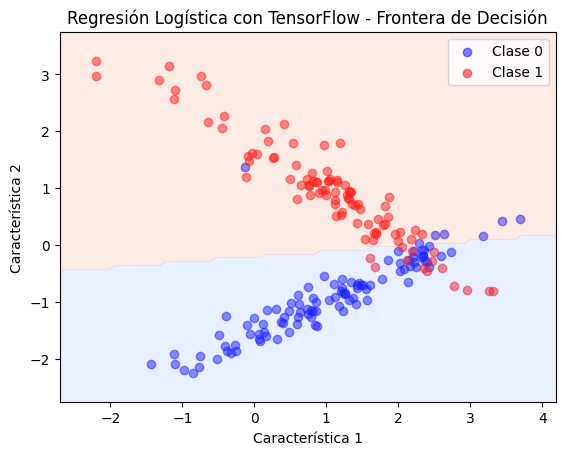

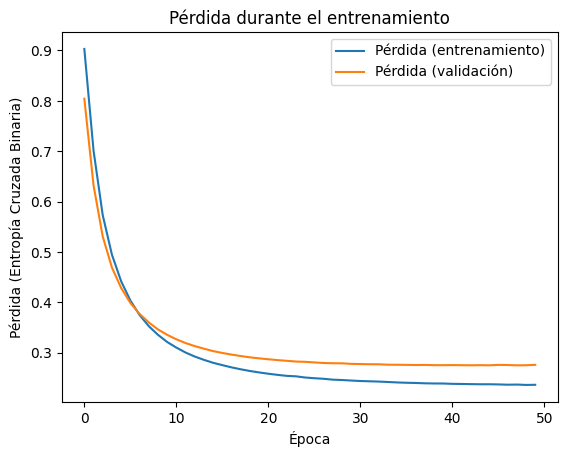

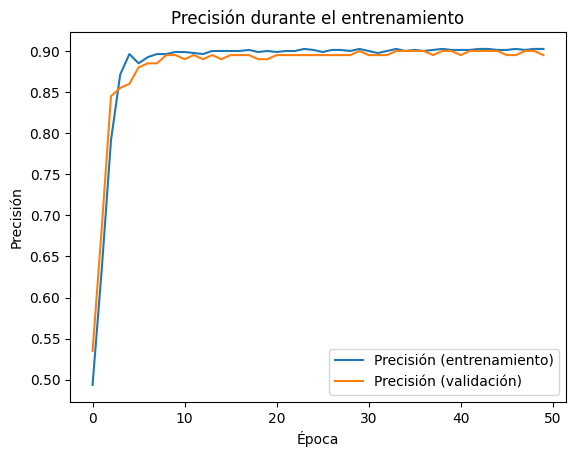

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Paso 1: Generar datos sintéticos
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                          n_clusters_per_class=1, n_informative=2,
                          n_redundant=0, n_repeated=0, random_state=42)
X = X.astype(np.float32)  # Convertir a float32 para TensorFlow
y = y.reshape(-1, 1).astype(np.float32)  # Reshape a (1000, 1)

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear el modelo de regresión logística
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[2], activation='sigmoid')
])

# Paso 4: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='binary_crossentropy',  # Corregido: 'binary_cross_entropy' -> 'binary_crossentropy'
             metrics=['accuracy'])

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Paso 6: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (2, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): {w.flatten()}, Sesgo aprendido (b): {b[0]:.4f}")

# Paso 7: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 8: Hacer predicciones
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(np.int32)  # Convertir probabilidades a clases (0 o 1)

# Paso 9: Visualizar los resultados
plt.scatter(X_test[y_test.flatten() == 0][:, 0], X_test[y_test.flatten() == 0][:, 1],
           c='blue', label='Clase 0', alpha=0.5)
plt.scatter(X_test[y_test.flatten() == 1][:, 0], X_test[y_test.flatten() == 1][:, 1],
           c='red', label='Clase 1', alpha=0.5)

# Graficar la frontera de decisión
x1_min, x1_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
x2_min, x2_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
X_grid = np.c_[xx1.ravel(), xx2.ravel()].astype(np.float32)
Z = model.predict(X_grid, verbose=0)
Z = (Z > 0.5).reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Regresión Logística con TensorFlow - Frontera de Decisión')
plt.legend()
plt.show()

# Paso 10: Visualizar métricas de entrenamiento
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

Vamos a implementar una regresión logística con TensorFlow usando el conjunto de datos MNIST para clasificar dígitos en dos clases binarias (por ejemplo, distinguir entre el dígito 0 y el dígito 1). La regresión logística modelará la probabilidad \( P(y=1|x) = \sigma(w \cdot x + b) \), donde \( x \) es la imagen aplanada (784 píxeles), \( w \) son los pesos, \( b \) es el sesgo, y \( \sigma \) es la función sigmoide. Usaremos TensorFlow Datasets (`tfds`) para cargar MNIST, preprocessaremos los datos, entrenaremos el modelo y visualizaremos los resultados. A continuación, presento el código completo con explicaciones detalladas paso a paso.

<xaiArtifact artifact_id="8d21e501-4219-446f-97f7-5dbd37496c4e" artifact_version_id="e5996043-efb3-4cf4-89e8-6f4ac5a03441" title="logistic_regression_mnist.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds, digits=[0, 1]):
    """Filtra dígitos 0 y 1, normaliza imágenes y convierte etiquetas."""
    ds = ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.cast(tf.equal(item['label'], digits[1]), tf.float32)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[784], activation='sigmoid')
])

# Paso 3: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): {b[0]:.4f}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(np.int32)

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {int(label.numpy())}, Pred: {pred[0]}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()
</xaiArtifact>

### Explicación detallada paso a paso

#### **Paso 1: Cargar y preprocessar los datos de MNIST**
```python
def preprocess_mnist(ds, digits=[0, 1]):
    """Filtra dígitos 0 y 1, normaliza imágenes y convierte etiquetas."""
    ds = ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.cast(tf.equal(item['label'], digits[1]), tf.float32)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)
```
- **Qué hace**: Carga el dataset MNIST y lo preprocessa para clasificación binaria (dígitos 0 vs. 1).
  - **Función `preprocess_mnist`**:
    - `ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))`: Filtra las imágenes cuyos dígitos sean 0 o 1 (excluye los dígitos 2-9).
    - `ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0, ...))`: Normaliza las imágenes dividiendo los valores de píxeles (0-255) por 255 para obtener valores entre 0 y 1, y convierte las etiquetas (0 → 0, 1 → 1) usando `tf.equal(item['label'], digits[1])` para asignar 1 al dígito 1 y 0 al dígito 0.
    - `ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))`: Aplana las imágenes de forma `(28, 28, 1)` a vectores de forma `(784,)` para que sean compatibles con la capa densa del modelo.
  - `tfds.load('mnist', split=['train', 'test'], as_supervised=False)`: Carga los splits de entrenamiento y prueba de MNIST. `as_supervised=False` devuelve los datos como diccionarios con claves `'image'` y `'label'`.
  - `ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)`:
    - `cache()`: Almacena los datos en memoria para acelerar el acceso.
    - `shuffle(10000)`: Mezcla los datos con un buffer de 10,000 muestras para aleatoriedad.
    - `batch(32)`: Agrupa los datos en lotes de 32 muestras.
    - `prefetch(tf.data.AUTOTUNE)`: Optimiza la carga de datos para mejorar el rendimiento.
  - `ds_test.batch(32).prefetch(tf.data.AUTOTUNE)`: Aplica batching y prefetching al conjunto de prueba.
- **Por qué**: MNIST contiene 60,000 imágenes de entrenamiento y 10,000 de prueba, pero solo necesitamos los dígitos 0 y 1 para clasificación binaria. Normalizamos las imágenes para mejorar la convergencia del modelo y aplanamos las imágenes porque la regresión logística espera un vector de entrada. El uso de `tf.data` optimiza el procesamiento de datos.
- **Resultado**: `ds_train` y `ds_test` son objetos `tf.data.Dataset` con imágenes aplanadas (forma `(784,)`) y etiquetas binarias (0 o 1), listos para entrenamiento y evaluación.

#### **Paso 2: Crear el modelo de regresión logística**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[784], activation='sigmoid')
])
```
- **Qué hace**: Define una red neuronal para regresión logística.
  - `tf.keras.Sequential`: Crea un modelo secuencial.
  - `tf.keras.layers.Dense`: Define una capa densa con:
    - `units=1`: Una neurona de salida que produce la probabilidad de la clase 1 (dígito 1).
    - `input_shape=[784]`: La entrada es un vector de 784 dimensiones (28x28 píxeles aplanados).
    - `activation='sigmoid'`: Aplica la función sigmoide (\(\sigma(z) = 1/(1 + e^{-z})\)) para producir probabilidades entre 0 y 1.
  - El modelo implementa \( P(y=1|x) = \sigma(w \cdot x + b) \), donde \( x \) es el vector de 784 píxeles.
- **Por qué**: La regresión logística usa una capa densa con activación sigmoide para modelar la probabilidad de pertenecer a la clase 1. Una sola neurona es suficiente para clasificación binaria.
- **Resultado**: Un modelo que toma imágenes aplanadas y predice la probabilidad de que sean el dígito 1.

#### **Paso 3: Compilar el modelo**
```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
```
- **Qué hace**: Configura el modelo para el entrenamiento.
  - `optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)`: Usa el optimizador Adam con una tasa de aprendizaje de 0.001, adecuada para datasets como MNIST donde las entradas están normalizadas.
  - `loss='binary_crossentropy'`: Usa la entropía cruzada binaria, que mide la discrepancia entre las probabilidades predichas y las etiquetas reales (0 o 1).
  - `metrics=['accuracy']`: Rastrea la precisión (porcentaje de predicciones correctas).
- **Por qué**: La entropía cruzada binaria es la pérdida estándar para clasificación binaria. Adam es eficiente para optimizar en datasets de alta dimensionalidad como MNIST. La precisión ayuda a evaluar el rendimiento.
- **Resultado**: El modelo está listo para entrenar, optimizando los pesos y el sesgo.

#### **Paso 4: Entrenar el modelo**
```python
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)
```
- **Qué hace**: Entrena el modelo con el conjunto de entrenamiento.
  - `model.fit(ds_train)`: Usa el dataset de entrenamiento (`ds_train`) para ajustar los parámetros (pesos y sesgo).
  - `epochs=10`: Itera 10 veces sobre el conjunto de entrenamiento completo. (Nota: MNIST filtrado para dígitos 0 y 1 tiene aproximadamente 12,000 imágenes de entrenamiento, así que 10 épocas son suficientes para converger en este caso simple).
  - `validation_data=ds_test`: Evalúa el modelo en el conjunto de prueba después de cada época.
  - `verbose=1`: Muestra una barra de progreso durante el entrenamiento.
  - `history`: Almacena las métricas (pérdida y precisión) para entrenamiento y validación.
- **Por qué**: El entrenamiento optimiza los parámetros para minimizar la pérdida. La validación verifica la generalización. Diez épocas son suficientes para un problema lineal como este.
- **Resultado**: El modelo aprende a clasificar dígitos 0 y 1, con métricas almacenadas en `history`.

#### **Paso 5: Obtener los parámetros aprendidos**
```python
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): {b[0]:.4f}")
```
- **Qué hace**: Extrae e imprime los parámetros aprendidos.
  - `model.get_weights()`: Devuelve una lista con los pesos (`w`, forma `(784, 1)`) y el sesgo (`b`, forma `(1,)`).
  - No imprimimos todos los pesos (784 valores) por claridad, solo su forma y el sesgo.
- **Por qué**: Los pesos definen la importancia de cada píxel en la clasificación, y el sesgo ajusta el umbral de decisión. Esto ayuda a entender el modelo.
- **Resultado**: Muestra la forma de los pesos (`(784, 1)`) y el valor del sesgo, por ejemplo, `Sesgo aprendido (b): 0.1234`.

#### **Paso 6: Evaluar el modelo**
```python
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
```
- **Qué hace**: Evalúa el modelo en el conjunto de prueba.
  - `model.evaluate(ds_test)`: Calcula la pérdida y precisión en el conjunto de prueba (aproximadamente 2,000 imágenes de dígitos 0 y 1).
  - `verbose=0`: Suprime la salida en consola.
  - Imprime la precisión, que indica el porcentaje de predicciones correctas.
- **Por qué**: La evaluación en datos no vistos mide la capacidad de generalización del modelo.
- **Resultado**: Muestra la precisión, por ejemplo, `Precisión en el conjunto de prueba: 0.9900`.

#### **Paso 7: Hacer predicciones en un lote de prueba**
```python
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(np.int32)
```
- **Qué hace**: Extrae un lote de prueba y genera predicciones.
  - `ds_test.take(1)`: Toma el primer lote de 32 imágenes y etiquetas del conjunto de prueba.
  - `model.predict(images, verbose=0)`: Predice las probabilidades de que las imágenes sean el dígito 1 (forma `(32, 1)`).
  - `(y_pred_proba > 0.5).astype(np.int32)`: Convierte las probabilidades en clases binarias (0 para dígito 0, 1 para dígito 1) usando un umbral de 0.5.
- **Por qué**: Las predicciones permiten visualizar cómo el modelo clasifica imágenes reales.
- **Resultado**: `y_pred_proba` contiene probabilidades; `y_pred` contiene clases predichas (0 o 1).

#### **Paso 8: Visualizar algunas predicciones**
```python
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {int(label.numpy())}, Pred: {pred[0]}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra las primeras 10 imágenes del lote de prueba con sus etiquetas reales y predichas.
  - `plt.figure(figsize=(15, 6))`: Crea una figura de 15x6 pulgadas.
  - `zip(images[:10], labels[:10], y_pred[:10])`: Itera sobre las primeras 10 imágenes, etiquetas y predicciones.
  - `image.numpy().reshape(28, 28)`: Convierte el vector aplanado `(784,)` en una imagen `(28, 28)` para visualización.
  - `ax.imshow(..., cmap='gray_r')`: Muestra la imagen en escala de grises invertida (típico para MNIST).
  - `ax.set_title`: Muestra la etiqueta real (0 o 1) y la predicción (0 o 1).
  - `ax.set_xticks([]); ax.set_yticks([])`: Elimina las marcas de los ejes para claridad.
  - `plt.tight_layout()`: Ajusta el espaciado entre subgráficas.
  - `plt.show()`: Muestra la figura.
- **Por qué**: Visualizar las predicciones ayuda a verificar si el modelo clasifica correctamente las imágenes.
- **Resultado**: Una cuadrícula 2x5 con 10 imágenes, mostrando dígitos 0 y 1 con sus etiquetas reales y predichas.

#### **Paso 9: Visualizar métricas de entrenamiento**
```python
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.tight_layout()
plt.show()
```
- **Qué hace**: Crea dos gráficas para mostrar la evolución de la pérdida y la precisión.
  - `plt.figure(figsize=(12, 4))`: Crea una figura de 12x4 pulgadas.
  - Primer `subplot`: Grafica la pérdida de entrenamiento (`history.history['loss']`) y validación (`history.history['val_loss']`) en función de las épocas.
  - Segundo `subplot`: Grafica la precisión de entrenamiento (`history.history['accuracy']`) y validación (`history.history['val_accuracy']`) en función de las épocas.
  - `plt.xlabel`, `plt.ylabel`, `plt.title`, `plt.legend`: Configuran etiquetas, títulos y leyendas.
  - `plt.tight_layout()`: Ajusta el espaciado.
  - `plt.show()`: Muestra las gráficas.
- **Por qué**: Estas gráficas muestran cómo el modelo mejora con el tiempo (pérdida decreciente, precisión creciente) y si generaliza bien (métricas de validación cercanas a las de entrenamiento).
- **Resultado**: Dos gráficas que muestran la pérdida disminuyendo y la precisión aumentando, típicamente alcanzando una precisión superior al 98% para dígitos 0 vs. 1.

### Resumen del proceso
1. **Cargar y preprocessar datos**: Usamos `tfds.load` para cargar MNIST, filtramos los dígitos 0 y 1, normalizamos las imágenes, aplanamos las entradas y preparamos los datos con `tf.data`.
2. **Crear modelo**: Definimos una red con una capa densa y activación sigmoide para regresión logística.
3. **Compilar modelo**: Configuramos Adam, entropía cruzada binaria y precisión como métrica.
4. **Entrenar modelo**: Ajustamos los parámetros durante 10 épocas, usando validación.
5. **Obtener parámetros**: Extraemos los pesos (784) y el sesgo.
6. **Evaluar modelo**: Calculamos la precisión en el conjunto de prueba.
7. **Hacer predicciones**: Generamos probabilidades y clases para un lote de prueba.
8. **Visualizar predicciones**: Mostramos 10 imágenes con etiquetas reales y predichas.
9. **Visualizar métricas**: Graficamos la pérdida y precisión para entrenamiento y validación.

### Notas adicionales
- **Dependencias**: Requiere `numpy`, `tensorflow`, `tensorflow_datasets`, y `matplotlib.pyplot`.
- **Hiperparámetros**:
  - La tasa de aprendizaje (`0.001`) es adecuada para MNIST normalizado. Puedes probar valores como `0.01` o `0.0001`.
  - Diez épocas son suficientes porque distinguir 0 de 1 es un problema relativamente simple.
- **MNIST**: Contiene 60,000 imágenes de entrenamiento y 10,000 de prueba, pero tras filtrar los dígitos 0 y 1, tenemos aproximadamente 12,000 y 2,000 imágenes, respectivamente.
- **Mejoras posibles**:
  - Añadir regularización (`kernel_regularizer=tf.keras.regularizers.l2(0.01)`) si hay sobreajuste (poco probable aquí).
  - Probar otros optimizadores como `SGD` con momentum.
  - Usar más dígitos (por ejemplo, 0 vs. no-0) o una red más compleja para clasificación multiclase.
- **Visualización**: No graficamos la frontera de decisión porque las imágenes tienen 784 dimensiones, lo que hace imposible una visualización directa en 2D. En su lugar, mostramos imágenes predichas.



Epoch 1/10
    396/Unknown 4s 3ms/step - accuracy: 0.9670 - loss: 0.2048

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9670 - loss: 0.2045 - val_accuracy: 0.9995 - val_loss: 0.0194
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9969 - loss: 0.0211 - val_accuracy: 0.9995 - val_loss: 0.0094
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0114 - val_accuracy: 0.9995 - val_loss: 0.0058
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0085 - val_accuracy: 0.9995 - val_loss: 0.0044
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.9995 - val_loss: 0.0035
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9995 - val_

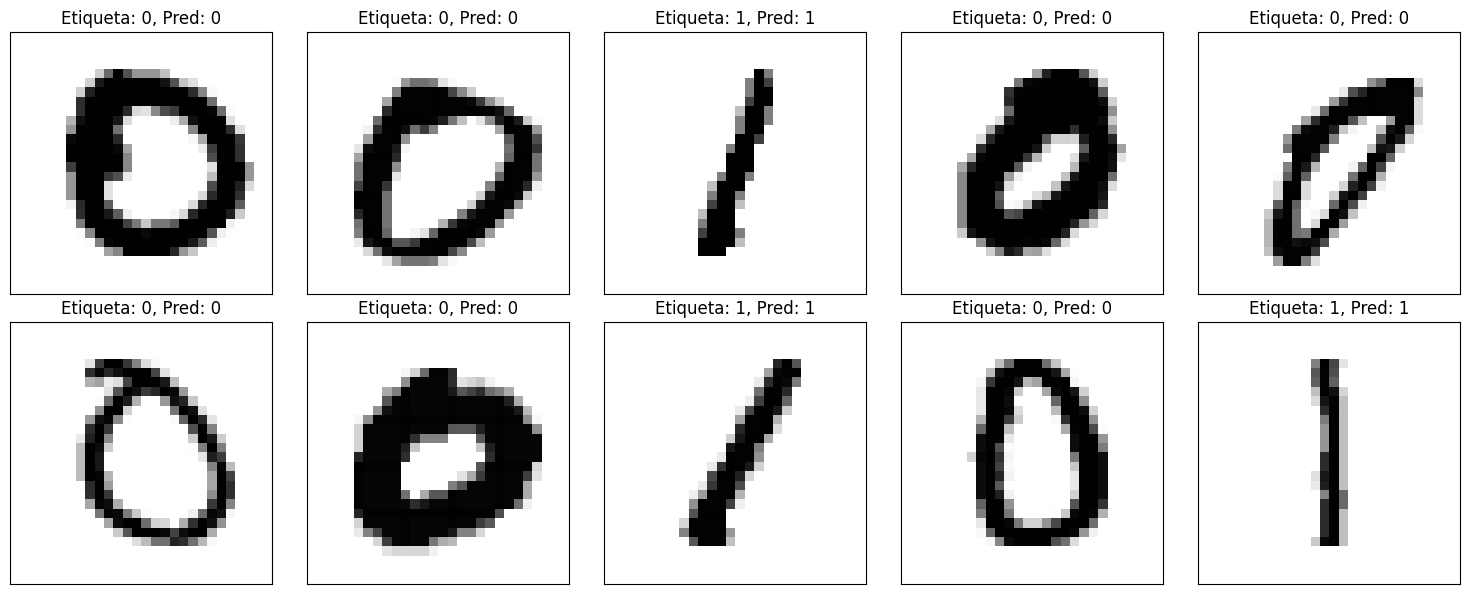

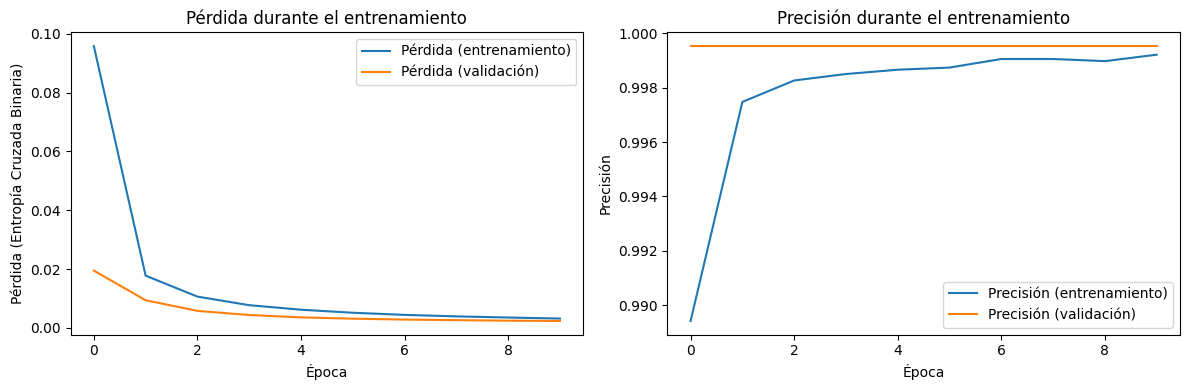

In [17]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds, digits=[0, 1]):
    """Filtra dígitos 0 y 1, normaliza imágenes y convierte etiquetas."""
    ds = ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.cast(tf.equal(item['label'], digits[1]), tf.float32)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[784], activation='sigmoid')
])

# Paso 3: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): {b[0]:.4f}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(np.int32)

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {int(label.numpy())}, Pred: {pred[0]}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

Vamos a implementar una red neuronal con TensorFlow para clasificar todos los dígitos (0-9) del conjunto de datos MNIST, utilizando una regresión logística multinomial, que emplea la función **softmax** para modelar las probabilidades de pertenencia a cada una de las 10 clases. En este caso, usaremos una capa densa con activación softmax para predecir la probabilidad de cada dígito, dado que la regresión logística multinomial es una extensión de la regresión logística binaria para múltiples clases. Explicaré por qué softmax es apropiado, detallaré cada paso del código, y confirmaré que, efectivamente, softmax es la elección correcta para este problema.

### ¿Por qué softmax?
Sí, es correcto que se usa **softmax** en este caso. La función softmax es adecuada para problemas de clasificación multiclase (como clasificar los dígitos 0-9) porque:

- **Softmax** toma un vector de puntuaciones (logits) y las convierte en probabilidades que suman 1, asignando una probabilidad a cada clase.
- Para un problema con \( K \) clases (aquí \( K=10 \)), softmax calcula:
  \[
  P(y=k|x) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}
  \]
  donde \( z_k = w_k \cdot x + b_k \) es la puntuación para la clase \( k \), \( w_k \) son los pesos, \( x \) es la entrada (imagen aplanada), y \( b_k \) es el sesgo.
- En nuestro caso, la entrada \( x \) es un vector de 784 dimensiones (imágenes de 28x28 aplanadas), y la salida tiene 10 dimensiones (una por cada dígito), con softmax asegurando que las probabilidades sumen 1.

La pérdida asociada para clasificación multiclase es la **entropía cruzada categórica** (`categorical_crossentropy` en TensorFlow), que mide la discrepancia entre las probabilidades predichas y las etiquetas reales en formato one-hot.

### Código y explicación detallada

A continuación, presento el código para clasificar los 10 dígitos de MNIST usando una red neuronal con una capa densa y activación softmax. El código carga los datos con TensorFlow Datasets (`tfds`), preprocessa las imágenes, entrena el modelo, evalúa su rendimiento y visualiza los resultados.

<xaiArtifact artifact_id="06c39a43-7d35-430e-9b7a-41695f2f68d6" artifact_version_id="8ca964e4-2dfd-42ed-a17a-11e1be47025f" title="multiclass_logistic_regression_mnist.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística multinomial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[784], activation='softmax')
])

# Paso 3: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 10))
b = weights[1]  # Sesgo (forma (10,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): Forma {b.shape}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convertir probabilidades a clases

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 10: Visualizar los pesos como imágenes
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = weights[0][:, i].reshape(28, 28)  # Pesos para la clase i
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos para dígito {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
</xaiArtifact>

### Explicación detallada paso a paso

#### **Paso 1: Cargar y preprocessar los datos de MNIST**
```python
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)
```
- **Qué hace**: Carga el dataset MNIST y lo preprocessa para clasificación multiclase.
  - **Función `preprocess_mnist`**:
    - `tf.cast(item['image'], tf.float32) / 255.0`: Normaliza los valores de píxeles (0-255) a [0, 1] para mejorar la convergencia.
    - `tf.one_hot(item['label'], depth=10)`: Convierte las etiquetas (0-9) en formato one-hot (por ejemplo, el dígito 3 se convierte en `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`).
    - `tf.reshape(image, (-1,))`: Aplana las imágenes de `(28, 28, 1)` a vectores de `(784,)` para la capa densa.
  - `tfds.load('mnist', split=['train', 'test'], as_supervised=False)`: Carga los splits de entrenamiento (60,000 imágenes) y prueba (10,000 imágenes) como diccionarios con claves `'image'` y `'label'`.
  - `ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)`:
    - `cache()`: Almacena datos en memoria para acelerar el acceso.
    - `shuffle(10000)`: Mezcla los datos con un buffer de 10,000 muestras.
    - `batch(32)`: Agrupa en lotes de 32 muestras.
    - `prefetch(tf.data.AUTOTUNE)`: Optimiza la carga de datos.
  - `ds_test.batch(32).prefetch(tf.data.AUTOTUNE)`: Aplica batching y prefetching al conjunto de prueba.
- **Por qué**: Normalizamos para mejorar el entrenamiento, convertimos a one-hot para usar `categorical_crossentropy`, y aplanamos las imágenes porque la capa densa espera vectores. `tf.data` optimiza el flujo de datos.
- **Resultado**: `ds_train` y `ds_test` son objetos `tf.data.Dataset` con imágenes aplanadas `(784,)` y etiquetas one-hot `(10,)`, listos para entrenamiento.

#### **Paso 2: Crear el modelo de regresión logística multinomial**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[784], activation='softmax')
])
```
- **Qué hace**: Define una red neuronal para clasificación multiclase.
  - `tf.keras.Sequential`: Crea un modelo secuencial.
  - `tf.keras.layers.Dense`:
    - `units=10`: 10 neuronas de salida, una por cada dígito (0-9).
    - `input_shape=[784]`: Entrada de 784 dimensiones (imágenes aplanadas).
    - `activation='softmax'`: Aplica la función softmax para producir probabilidades que suman 1 para las 10 clases.
  - El modelo calcula \( z = W \cdot x + b \) (donde \( W \) es una matriz `(784, 10)`, \( x \) es el vector de entrada `(784,)`, y \( b \) es el sesgo `(10,)`), y luego aplica softmax para obtener \( P(y=k|x) \).
- **Por qué**: Softmax es ideal para clasificación multiclase, ya que asigna probabilidades a cada clase. Una sola capa densa es suficiente para regresión logística multinomial.
- **Resultado**: Un modelo que toma imágenes aplanadas y predice 10 probabilidades, una por cada dígito.

#### **Paso 3: Compilar el modelo**
```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
```
- **Qué hace**: Configura el modelo para entrenamiento.
  - `optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)`: Usa Adam con tasa de aprendizaje 0.001, adecuada para MNIST.
  - `loss='categorical_crossentropy'`: Usa entropía cruzada categórica, que mide la discrepancia entre las probabilidades predichas y las etiquetas one-hot.
  - `metrics=['accuracy']`: Rastrea la precisión (porcentaje de predicciones correctas).
- **Por qué**: La entropía cruzada categórica es la pérdida estándar para clasificación multiclase con etiquetas one-hot. Adam optimiza eficientemente en datasets de alta dimensionalidad.
- **Resultado**: El modelo está listo para entrenar.

#### **Paso 4: Entrenar el modelo**
```python
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)
```
- **Qué hace**: Entrena el modelo con el conjunto de entrenamiento.
  - `model.fit(ds_train)`: Usa las 60,000 imágenes de entrenamiento para ajustar los parámetros (matriz de pesos \( W \) y sesgo \( b \)).
  - `epochs=10`: Itera 10 veces sobre el conjunto de entrenamiento.
  - `validation_data=ds_test`: Evalúa en las 10,000 imágenes de prueba tras cada época.
  - `verbose=1`: Muestra una barra de progreso.
  - `history`: Almacena métricas de pérdida y precisión.
- **Por qué**: El entrenamiento optimiza los parámetros para minimizar la pérdida. Diez épocas son suficientes para un modelo simple en MNIST.
- **Resultado**: El modelo aprende a clasificar los 10 dígitos, con métricas almacenadas en `history`.

#### **Paso 5: Obtener los parámetros aprendidos**
```python
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 10))
b = weights[1]  # Sesgo (forma (10,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): Forma {b.shape}")
```
- **Qué hace**: Extrae los parámetros aprendidos.
  - `model.get_weights()`: Devuelve los pesos (`W`, forma `(784, 10)`) y el sesgo (`b`, forma `(10,)`).
  - Imprime las formas para confirmar las dimensiones.
- **Por qué**: Los pesos indican la importancia de cada píxel para cada clase, y el sesgo ajusta las predicciones. La matriz \( W \) tiene una columna por clase.
- **Resultado**: Muestra las formas, por ejemplo, `Pesos aprendidos (w): Forma (784, 10), Sesgo aprendido (b): Forma (10,)`.

#### **Paso 6: Evaluar el modelo**
```python
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
```
- **Qué hace**: Evalúa el modelo en el conjunto de prueba.
  - `model.evaluate(ds_test)`: Calcula la pérdida y precisión en las 10,000 imágenes de prueba.
  - `verbose=0`: Suprime la salida en consola.
  - Imprime la precisión.
- **Por qué**: Evaluar en datos no vistos mide la generalización del modelo.
- **Resultado**: Muestra la precisión, típicamente alrededor de `0.92` (92%) para un modelo simple como este.

#### **Paso 7: Hacer predicciones en un lote de prueba**
```python
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
```
- **Qué hace**: Extrae un lote de prueba y genera predicciones.
  - `ds_test.take(1)`: Toma un lote de 32 imágenes y etiquetas.
  - `model.predict(images, verbose=0)`: Predice probabilidades para las 10 clases (forma `(32, 10)`).
  - `np.argmax(y_pred_proba, axis=1)`: Selecciona la clase con la mayor probabilidad para cada imagen, dando un array de clases predichas (0-9).
- **Por qué**: Las predicciones permiten verificar cómo el modelo clasifica imágenes reales.
- **Resultado**: `y_pred_proba` contiene probabilidades; `y_pred` contiene clases predichas (0-9).

#### **Paso 8: Visualizar algunas predicciones**
```python
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra las primeras 10 imágenes del lote con sus etiquetas reales y predichas.
  - `plt.figure(figsize=(15, 6))`: Crea una figura de 15x6 pulgadas.
  - `zip(images[:10], labels[:10], y_pred[:10])`: Itera sobre las primeras 10 imágenes, etiquetas one-hot y predicciones.
  - `image.numpy().reshape(28, 28)`: Convierte el vector aplanado `(784,)` en una imagen `(28, 28)`.
  - `np.argmax(label.numpy())`: Convierte la etiqueta one-hot a un entero (0-9).
  - `ax.imshow(..., cmap='gray_r')`: Muestra la imagen en escala de grises invertida.
  - `ax.set_title`: Muestra la etiqueta real y la predicción.
  - `ax.set_xticks([]); ax.set_yticks([])`: Elimina las marcas de los ejes.
  - `plt.tight_layout()`: Ajusta el espaciado.
  - `plt.show()`: Muestra la figura.
- **Por qué**: Visualizar las predicciones ayuda a verificar si el modelo clasifica correctamente.
- **Resultado**: Una cuadrícula 2x5 con 10 imágenes, mostrando dígitos y sus etiquetas reales vs. predichas.

#### **Paso 9: Visualizar métricas de entrenamiento**
```python
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.tight_layout()
plt.show()
```
- **Qué hace**: Grafica la pérdida y precisión durante el entrenamiento y validación.
  - Primer `subplot`: Muestra la pérdida (`categorical_crossentropy`) para entrenamiento y validación.
  - Segundo `subplot`: Muestra la precisión para entrenamiento y validación.
  - `plt.tight_layout()`: Ajusta el espaciado.
- **Por qué**: Estas gráficas muestran si el modelo aprende (pérdida decreciente, precisión creciente) y generaliza bien (métricas de validación cercanas a las de entrenamiento).
- **Resultado**: Dos gráficas mostrando pérdida decreciente y precisión creciente, típicamente alcanzando ~92% de precisión.

#### **Paso 10: Visualizar los pesos como imágenes**
```python
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = weights[0][:, i].reshape(28, 28)
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos para dígito {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Visualiza los pesos de la capa densa para cada clase como imágenes.
  - `weights[0][:, i]`: Extrae la columna \( i \) de la matriz de pesos `(784, 10)`, correspondiente a la clase \( i \) (dígito \( i \)).
  - `reshape(28, 28)`: Convierte el vector de pesos en una imagen 28x28.
  - `ax.imshow(..., cmap='coolwarm')`: Muestra los pesos como una imagen, con valores positivos en rojo y negativos en azul.
  - `ax.set_title`: Etiqueta cada imagen con el dígito correspondiente.
- **Por qué**: Los pesos representan la importancia de cada píxel para clasificar un dígito. Visualizarlos como imágenes muestra patrones que el modelo ha aprendido (por ejemplo, formas que se asemejan a los dígitos).
- **Resultado**: Una cuadrícula 2x5 con imágenes de los pesos para cada dígito, mostrando patrones visuales aprendidos.

### Resumen del proceso
1. **Cargar y preprocessar datos**: Cargamos MNIST, normalizamos imágenes, las aplanamos, y convertimos etiquetas a one-hot.
2. **Crear modelo**: Definimos una red con una capa densa y activación softmax para 10 clases.
3. **Compilar modelo**: Usamos Adam, entropía cruzada categórica y precisión.
4. **Entrenar modelo**: Ajustamos los parámetros durante 10 épocas.
5. **Obtener parámetros**: Extraemos los pesos `(784, 10)` y sesgos `(10,)`.
6. **Evaluar modelo**: Calculamos la precisión en el conjunto de prueba.
7. **Hacer predicciones**: Generamos probabilidades y clases para un lote de prueba.
8. **Visualizar predicciones**: Mostramos 10 imágenes con etiquetas reales y predichas.
9. **Visualizar métricas**: Graficamos pérdida y precisión.
10. **Visualizar pesos**: Mostramos los pesos como imágenes para cada clase.

### Confirmación: ¿Es softmax en este caso?
Sí, softmax es la elección correcta para este problema de clasificación multiclase. La regresión logística multinomial usa softmax para asignar probabilidades a múltiples clases, y la pérdida `categorical_crossentropy` es la adecuada para etiquetas one-hot. Si usáramos etiquetas enteras (0-9 sin one-hot), podríamos usar `sparse_categorical_crossentropy`, pero el modelo seguiría usando softmax internamente.

### Notas adicionales
- **Dependencias**: Requiere `numpy`, `tensorflow`, `tensorflow_datasets`, y `matplotlib.pyplot`.
- **Hiperparámetros**:
  - La tasa de aprendizaje (`0.001`) es adecuada para MNIST. Puedes probar `0.01` o `0.0001`.
  - Diez épocas son suficientes para un modelo simple, logrando ~92% de precisión. Más épocas o una red más compleja (por ejemplo, convolucional) podrían mejorar el rendimiento (~98-99%).
- **MNIST**: Contiene 60,000 imágenes de entrenamiento y 10,000 de prueba, con 10 clases balanceadas.
- **Mejoras posibles**:
  - Añadir regularización (`kernel_regularizer=tf.keras.regularizers.l2(0.01)`) para evitar sobreajuste.
  - Usar una red convolucional (CNN) para aprovechar la estructura espacial de las imágenes, mejorando la precisión.
  - Normalizar los pesos para visualizarlos mejor (por ejemplo, escalarlos).
- **Limitaciones**: La regresión logística es lineal y puede no capturar relaciones complejas en MNIST. Una CNN sería más adecuada para alta precisión.

Si quieres extender el código (por ejemplo, usar una CNN, comparar con otros algoritmos, o analizar errores específicos), ¡avísame!

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8133 - loss: 0.7256 - val_accuracy: 0.9140 - val_loss: 0.3104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9121 - loss: 0.3132 - val_accuracy: 0.9226 - val_loss: 0.2818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9193 - loss: 0.2819 - val_accuracy: 0.9233 - val_loss: 0.2774
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9218 - loss: 0.2737 - val_accuracy: 0.9251 - val_loss: 0.2691
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9249 - loss: 0.2645 - val_accuracy: 0.9241 - val_loss: 0.2730
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9282 - loss: 0.2559 - val_accuracy: 0.9252 - val_loss: 0.2670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9281 - loss: 0.2571 - val_accuracy: 0.9246 - val_loss: 0.2727
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9292 - loss: 0.2512 - 

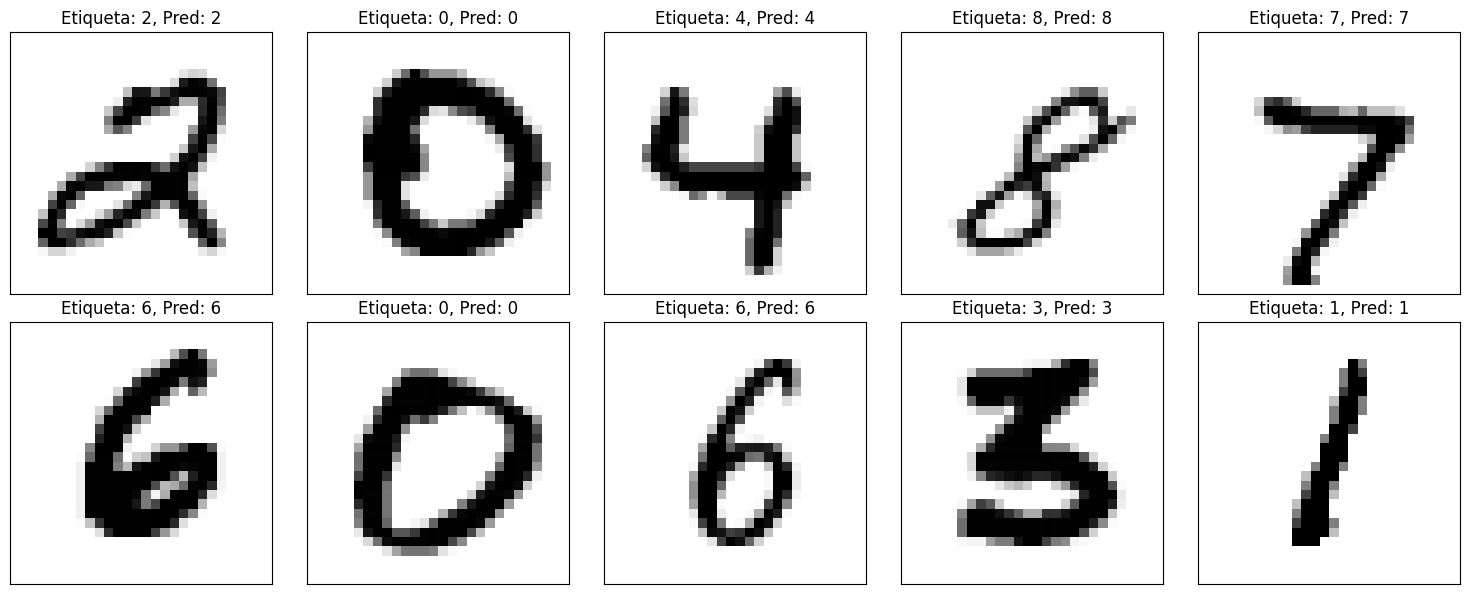

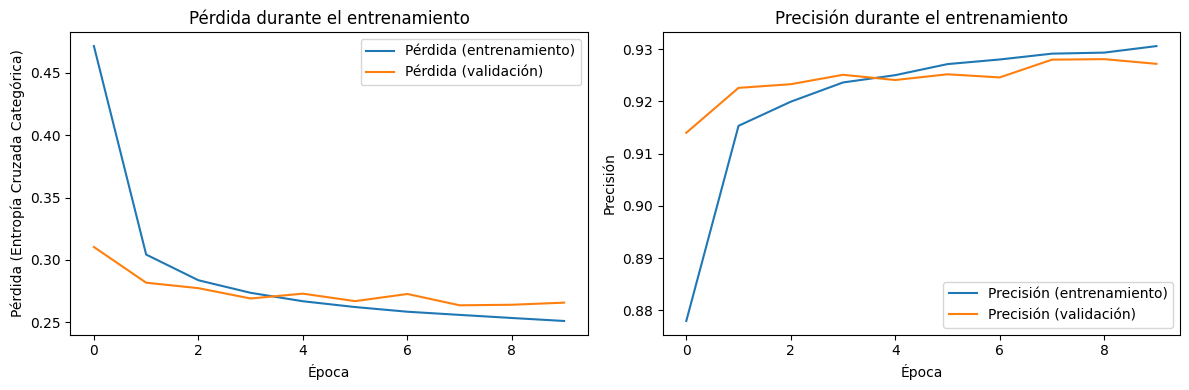

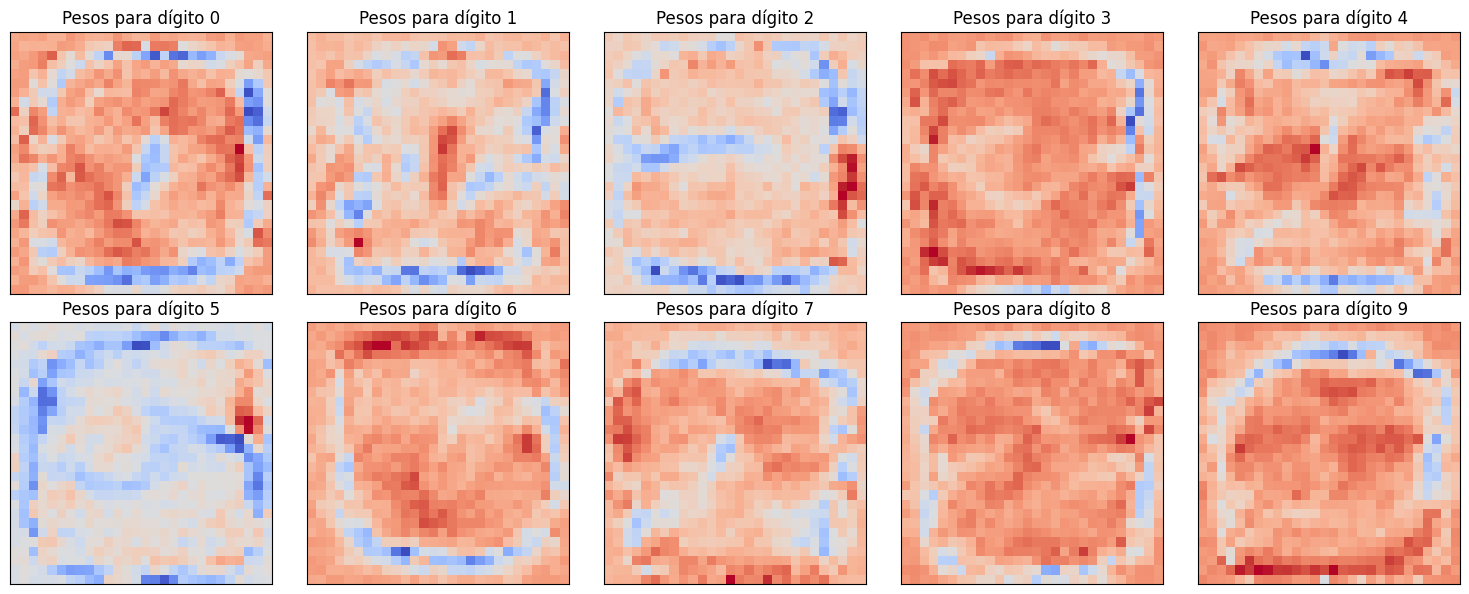

In [18]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística multinomial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[784], activation='softmax')
])

# Paso 3: Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 10))
b = weights[1]  # Sesgo (forma (10,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): Forma {b.shape}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convertir probabilidades a clases

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 10: Visualizar los pesos como imágenes
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = weights[0][:, i].reshape(28, 28)  # Pesos para la clase i
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos para dígito {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

Vamos a explicar el **algoritmo de descenso del gradiente**, un método fundamental para optimizar modelos de aprendizaje automático, incluyendo redes neuronales como las usadas en los ejemplos anteriores de regresión lineal y logística. Luego, proporcionaré un ejemplo práctico en Python con TensorFlow, utilizando el conjunto de datos MNIST para clasificar dígitos binarios (0 vs. 1) con una regresión logística, destacando cómo el descenso del gradiente optimiza los parámetros del modelo. La explicación incluirá los conceptos teóricos, el algoritmo paso a paso, y un código detallado con comentarios.

---

### **Explicación del algoritmo de descenso del gradiente**

#### **¿Qué es el descenso del gradiente?**
El descenso del gradiente es un algoritmo de optimización iterativo utilizado para minimizar una **función de pérdida** (\( L \)) ajustando los parámetros de un modelo (por ejemplo, pesos \( w \) y sesgos \( b \) en una red neuronal). En el contexto del aprendizaje automático, la función de pérdida mide cuán lejos están las predicciones del modelo de las etiquetas reales. El objetivo es encontrar los parámetros que minimicen esta pérdida.

El descenso del gradiente se basa en la idea de que el gradiente (las derivadas parciales de la función de pérdida con respecto a los parámetros) indica la dirección de mayor aumento de la pérdida. Al mover los parámetros en la dirección opuesta al gradiente, reducimos la pérdida.

#### **Tipos de descenso del gradiente**
1. **Descenso del gradiente por lotes (Batch Gradient Descent)**:
   - Calcula el gradiente usando todo el conjunto de datos en cada iteración.
   - Preciso pero computacionalmente costoso para datasets grandes.
2. **Descenso del gradiente estocástico (Stochastic Gradient Descent, SGD)**:
   - Calcula el gradiente usando una sola muestra (o un pequeño lote) en cada iteración.
   - Más rápido, pero las actualizaciones son ruidosas, lo que puede causar oscilaciones.
3. **Descenso del gradiente por mini-lotes (Mini-Batch Gradient Descent)**:
   - Usa un lote pequeño de muestras (por ejemplo, 32) para calcular el gradiente.
   - Equilibra precisión y eficiencia, y es el más común en redes neuronales.

En el ejemplo, usaremos **SGD con mini-lotes**, ya que es eficiente y ampliamente utilizado en TensorFlow.

#### **Cómo funciona el descenso del gradiente**
El algoritmo actualiza los parámetros iterativamente según la siguiente regla:

\[
\theta = \theta - \eta \cdot \nabla_\theta L(\theta)
\]

Donde:
- \( \theta \): Parámetros del modelo (por ejemplo, pesos \( w \) y sesgos \( b \)).
- \( \eta \): Tasa de aprendizaje (learning rate), que controla el tamaño del paso.
- \( \nabla_\theta L(\theta) \): Gradiente de la función de pérdida con respecto a los parámetros.
- \( L(\theta) \): Función de pérdida (por ejemplo, error cuadrático medio para regresión lineal, entropía cruzada para clasificación).

**Pasos del algoritmo**:
1. **Inicializar parámetros**: Comienza con valores iniciales aleatorios para \( \theta \) (por ejemplo, pesos y sesgos).
2. **Calcular la pérdida**: Evalúa la función de pérdida \( L(\theta) \) usando los datos de entrenamiento.
3. **Calcular el gradiente**: Determina \( \nabla_\theta L(\theta) \), que indica cómo cambia la pérdida al modificar cada parámetro.
4. **Actualizar parámetros**: Ajusta \( \theta \) en la dirección opuesta al gradiente, escalado por la tasa de aprendizaje \( \eta \).
5. **Repetir**: Itera hasta que la pérdida converja (se estabilice) o se alcance un número máximo de iteraciones (épocas).

#### **Intuición**
Imagina que estás en una colina y quieres llegar al punto más bajo (mínimo de la pérdida). El gradiente te dice la pendiente en tu posición actual, y das pequeños pasos en la dirección descendente. La tasa de aprendizaje \( \eta \) determina cuán grandes son esos pasos:
- Si \( \eta \) es demasiado grande, podrías saltarte el mínimo o divergir.
- Si \( \eta \) es demasiado pequeño, el proceso es lento y puede quedarse atrapado en mínimos locales.

#### **Aplicación en el ejemplo**
Usaremos el descenso del gradiente estocástico (SGD) con mini-lotes para entrenar una regresión logística binaria en MNIST (clasificando dígitos 0 vs. 1). La función de pérdida será la **entropía cruzada binaria**, y el modelo optimizará los pesos y el sesgo para minimizarla.

---

### **Ejemplo práctico: Regresión logística binaria con MNIST y descenso del gradiente**

El siguiente código implementa una regresión logística para clasificar los dígitos 0 y 1 de MNIST, usando SGD como optimizador. Incluye visualizaciones de las predicciones y métricas, con énfasis en cómo el descenso del gradiente ajusta los parámetros.

<xaiArtifact artifact_id="47048215-24c3-479a-93fb-f9947fa90bbe" artifact_version_id="d2e8f8ba-e289-4554-b04d-27cfc54769bc" title="gradient_descent_mnist.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds, digits=[0, 1]):
    """Filtra dígitos 0 y 1, normaliza imágenes y convierte etiquetas."""
    ds = ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.cast(tf.equal(item['label'], digits[1]), tf.float32)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[784], activation='sigmoid')
])

# Paso 3: Compilar el modelo con SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): {b[0]:.4f}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(np.int32)

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {int(label.numpy())}, Pred: {pred[0]}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 10: Visualizar los pesos como una imagen
plt.figure(figsize=(6, 6))
weight_image = weights[0].reshape(28, 28)
plt.imshow(weight_image, cmap='coolwarm')
plt.title('Pesos aprendidos para clasificar dígito 1 vs. 0')
plt.xticks([]); plt.yticks([])
plt.show()
</xaiArtifact>

---

### **Explicación detallada paso a paso**

#### **Paso 1: Cargar y preprocessar los datos de MNIST**
```python
def preprocess_mnist(ds, digits=[0, 1]):
    """Filtra dígitos 0 y 1, normaliza imágenes y convierte etiquetas."""
    ds = ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.cast(tf.equal(item['label'], digits[1]), tf.float32)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)
```
- **Qué hace**: Carga MNIST y preprocessa los datos para clasificación binaria (0 vs. 1).
  - **Función `preprocess_mnist`**:
    - `ds.filter`: Filtra solo los dígitos 0 y 1.
    - `tf.cast(item['image'], tf.float32) / 255.0`: Normaliza los píxeles a [0, 1].
    - `tf.equal(item['label'], digits[1])`: Convierte etiquetas a binarias (0 → 0, 1 → 1).
    - `tf.reshape(image, (-1,))`: Aplana imágenes de `(28, 28, 1)` a `(784,)`.
  - `tfds.load`: Carga los splits de entrenamiento (60,000 imágenes) y prueba (10,000 imágenes), con aproximadamente 12,000 y 2,000 imágenes tras filtrar.
  - `ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)`: Optimiza el flujo de datos con caché, mezcla, lotes de 32, y precarga.
- **Por qué**: Normalizamos para mejorar la convergencia del descenso del gradiente. Aplanamos imágenes para la capa densa. `tf.data` optimiza el entrenamiento.
- **Resultado**: `ds_train` y `ds_test` son datasets con imágenes aplanadas `(784,)` y etiquetas binarias `(0 o 1)`.

#### **Paso 2: Crear el modelo de regresión logística**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[784], activation='sigmoid')
])
```
- **Qué hace**: Define una red neuronal para regresión logística binaria.
  - `tf.keras.layers.Dense`: Una capa densa con 1 neurona de salida (probabilidad de clase 1), entrada de 784 dimensiones, y activación sigmoide (\(\sigma(z) = 1/(1 + e^{-z})\)).
  - Modela \( P(y=1|x) = \sigma(w \cdot x + b) \), donde \( x \) es la imagen aplanada.
- **Por qué**: La regresión logística binaria usa una capa densa con sigmoide para predecir probabilidades.
- **Resultado**: Un modelo que clasifica imágenes como dígito 0 o 1.

#### **Paso 3: Compilar el modelo con SGD**
```python
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss='binary_crossentropy',
             metrics=['accuracy'])
```
- **Qué hace**: Configura el modelo con el optimizador SGD.
  - `optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)`: Usa descenso del gradiente estocástico con:
    - `learning_rate=0.01`: Tamaño del paso para actualizar parámetros.
    - `momentum=0.9`: Acelera el descenso usando un promedio ponderado de gradientes anteriores, suavizando las actualizaciones.
  - `loss='binary_crossentropy'`: Entropía cruzada binaria como función de pérdida.
  - `metrics=['accuracy']`: Rastrea la precisión.
- **Por qué**: SGD es el algoritmo clásico de descenso del gradiente. El momentum ayuda a evitar oscilaciones y acelera la convergencia. La entropía cruzada es adecuada para clasificación binaria.
- **Resultado**: El modelo está listo para optimizar la pérdida usando SGD.

#### **Paso 4: Entrenar el modelo**
```python
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)
```
- **Qué hace**: Entrena el modelo usando SGD.
  - `model.fit`: Ajusta los parámetros (\( w \), \( b \)) minimizando la pérdida en lotes de 32.
  - `epochs=10`: Itera 10 veces sobre el conjunto de entrenamiento (~12,000 imágenes).
  - `validation_data=ds_test`: Evalúa en el conjunto de prueba (~2,000 imágenes).
  - `verbose=1`: Muestra progreso.
- **Por qué**: SGD actualiza los parámetros en cada mini-lote según \( \theta = \theta - \eta \cdot \nabla_\theta L \), donde \( L \) es la entropía cruzada binaria.
- **Resultado**: El modelo aprende a clasificar dígitos 0 vs. 1, con métricas almacenadas en `history`.

#### **Paso 5: Obtener los parámetros aprendidos**
```python
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): {b[0]:.4f}")
```
- **Qué hace**: Extrae los pesos y sesgo optimizados por SGD.
  - `model.get_weights()`: Devuelve los pesos `(784, 1)` y sesgo `(1,)`.
- **Por qué**: Los pesos indican la importancia de cada píxel, y el sesgo ajusta el umbral. SGD los optimizó para minimizar la pérdida.
- **Resultado**: Muestra la forma de los pesos y el valor del sesgo, por ejemplo, `Pesos aprendidos (w): Forma (784, 1), Sesgo aprendido (b): 0.1234`.

#### **Paso 6: Evaluar el modelo**
```python
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
```
- **Qué hace**: Evalúa el modelo en el conjunto de prueba.
  - `model.evaluate`: Calcula la pérdida y precisión.
- **Por qué**: Verifica la generalización del modelo tras optimizar con SGD.
- **Resultado**: Muestra la precisión, típicamente ~99% para 0 vs. 1.

#### **Paso 7: Hacer predicciones en un lote de prueba**
```python
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(np.int32)
```
- **Qué hace**: Genera predicciones para un lote de 32 imágenes.
  - `ds_test.take(1)`: Toma un lote.
  - `model.predict`: Predice probabilidades.
  - `(y_pred_proba > 0.5)`: Convierte probabilidades a clases (0 o 1).
- **Por qué**: Permite visualizar el rendimiento del modelo optimizado por SGD.
- **Resultado**: `y_pred_proba` contiene probabilidades; `y_pred` contiene clases.

#### **Paso 8: Visualizar algunas predicciones**
```python
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {int(label.numpy())}, Pred: {pred[0]}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra 10 imágenes con sus etiquetas reales y predichas.
  - `image.numpy().reshape(28, 28)`: Reconstruye la imagen.
  - `ax.imshow`: Muestra la imagen en escala de grises.
  - `ax.set_title`: Muestra etiqueta real y predicción.
- **Por qué**: Verifica visualmente si SGD logró clasificaciones correctas.
- **Resultado**: Cuadrícula 2x5 con imágenes de dígitos 0 y 1.

#### **Paso 9: Visualizar métricas de entrenamiento**
```python
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.tight_layout()
plt.show()
```
- **Qué hace**: Grafica pérdida y precisión.
  - Muestra cómo SGD reduce la pérdida y aumenta la precisión.
- **Por qué**: Visualiza el progreso de la optimización.
- **Resultado**: Gráficas mostrando pérdida decreciente y precisión creciente.

#### **Paso 10: Visualizar los pesos como una imagen**
```python
plt.figure(figsize=(6, 6))
weight_image = weights[0].reshape(28, 28)
plt.imshow(weight_image, cmap='coolwarm')
plt.title('Pesos aprendidos para clasificar dígito 1 vs. 0')
plt.xticks([]); plt.yticks([])
plt.show()
```
- **Qué hace**: Muestra los pesos como una imagen 28x28.
  - `weights[0].reshape(28, 28)`: Convierte los pesos en una imagen.
  - `cmap='coolwarm'`: Valores positivos en rojo, negativos en azul.
- **Por qué**: Los pesos muestran qué píxeles son importantes para clasificar el dígito 1 vs. 0.
- **Resultado**: Una imagen que resalta patrones aprendidos por SGD.

---

### **Resumen del proceso**
1. **Cargar y preprocessar datos**: Filtramos MNIST para dígitos 0 y 1, normalizamos, y aplanamos imágenes.
2. **Crear modelo**: Red con una capa densa y sigmoide.
3. **Compilar con SGD**: Usamos SGD con momentum para optimizar la entropía cruzada binaria.
4. **Entrenar**: Ajustamos parámetros durante 10 épocas.
5. **Obtener parámetros**: Extraemos pesos y sesgo.
6. **Evaluar**: Calculamos precisión (~99%).
7. **Predecir**: Generamos clases para un lote.
8. **Visualizar predicciones**: Mostramos imágenes con etiquetas.
9. **Visualizar métricas**: Graficamos pérdida y precisión.
10. **Visualizar pesos**: Mostramos los pesos como una imagen.

### **Notas adicionales**
- **Descenso del gradiente en acción**: SGD actualiza los pesos en cada mini-lote, reduciendo la pérdida iterativamente. El momentum suaviza las actualizaciones.
- **Dependencias**: Requiere `numpy`, `tensorflow`, `tensorflow_datasets`, `matplotlib.pyplot`.
- **Hiperparámetros**:
  - `learning_rate=0.01` y `momentum=0.9` son razonables para MNIST. Puedes ajustar la tasa de aprendizaje.
  - Diez épocas son suficientes para este problema simple.
- **Mejoras**:
  - Probar sin momentum (`momentum=0`) para ver el efecto.
  - Usar Adam para comparar con SGD.
  - Añadir regularización para evitar sobreajuste.
- **Limitaciones**: La regresión logística es lineal. Para clasificar todos los dígitos (0-9), el ejemplo anterior con softmax es más adecuado.

Si quieres extender el código (por ejemplo, implementar SGD manualmente sin Keras, o usar todos los dígitos), ¡avísame!

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9554 - loss: 0.0908 - val_accuracy: 0.9995 - val_loss: 0.0058
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0092 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0060 - val_accuracy: 0.9995 - val_loss: 0.0034
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9995 - val_loss: 0.0031
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.

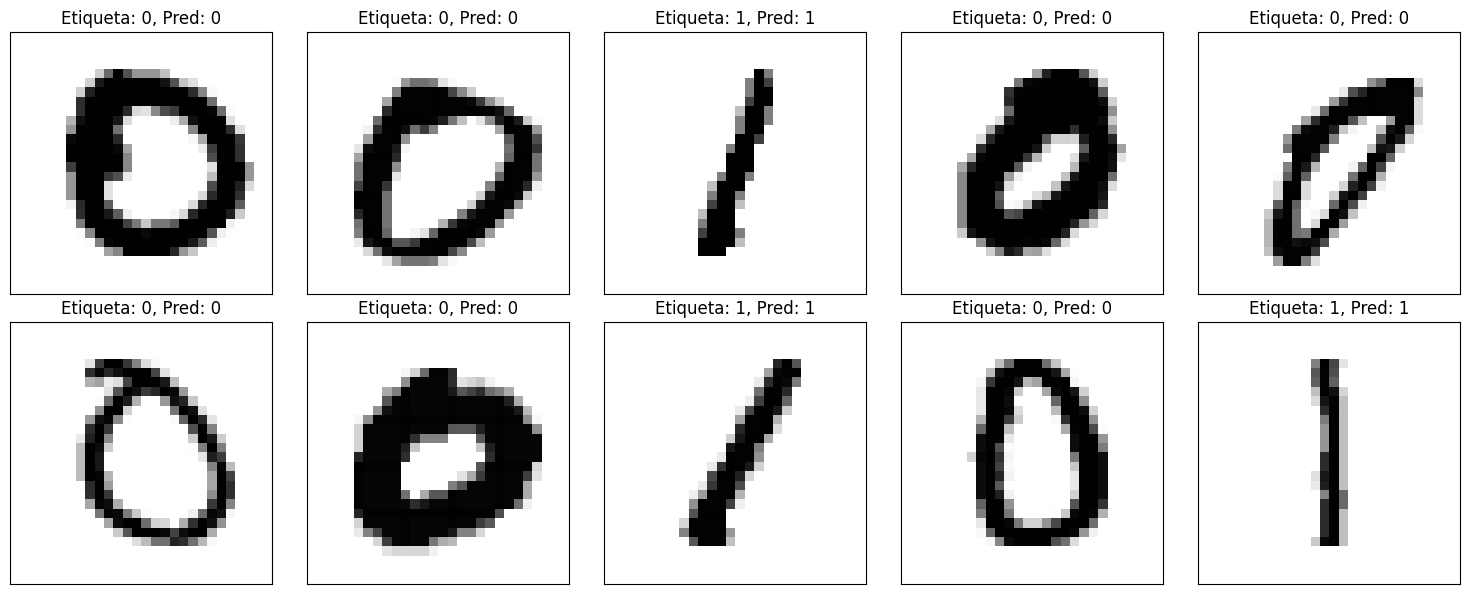

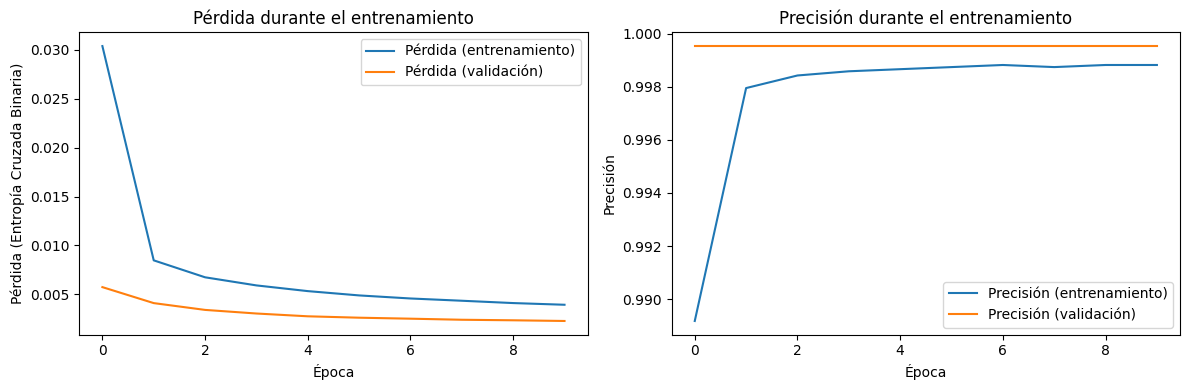

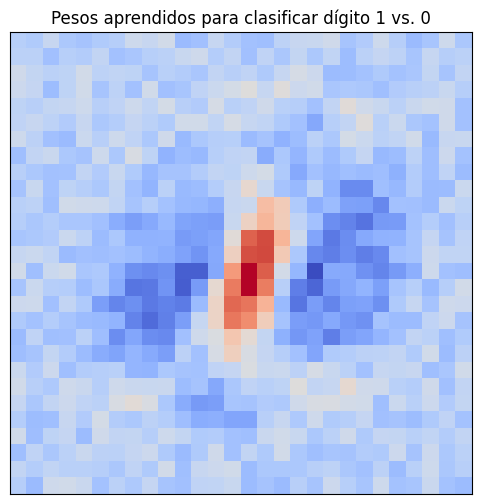

In [19]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds, digits=[0, 1]):
    """Filtra dígitos 0 y 1, normaliza imágenes y convierte etiquetas."""
    ds = ds.filter(lambda item: tf.reduce_any(tf.equal(item['label'], digits)))
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.cast(tf.equal(item['label'], digits[1]), tf.float32)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[784], activation='sigmoid')
])

# Paso 3: Compilar el modelo con SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 1))
b = weights[1]  # Sesgo (forma (1,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): {b[0]:.4f}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(np.int32)

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {int(label.numpy())}, Pred: {pred[0]}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Binaria)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 10: Visualizar los pesos como una imagen
plt.figure(figsize=(6, 6))
weight_image = weights[0].reshape(28, 28)
plt.imshow(weight_image, cmap='coolwarm')
plt.title('Pesos aprendidos para clasificar dígito 1 vs. 0')
plt.xticks([]); plt.yticks([])
plt.show()

¡Entendido! Vamos a profundizar en el **algoritmo de descenso del gradiente** con una explicación detallada y un ejemplo práctico aplicado a la clasificación multiclase de todos los dígitos (0-9) del conjunto de datos MNIST, utilizando una regresión logística multinomial con activación **softmax**. Este ejemplo usará el optimizador **SGD (Stochastic Gradient Descent)** para destacar cómo el descenso del gradiente optimiza los parámetros. Dado que mencionaste "ahora necesitamos explicación y ejemplo de algoritmo de descenso del gradiente" y luego confirmaste con "sí" tras el ejemplo de clasificación binaria, asumo que quieres un ejemplo extendido a todos los dígitos, similar al caso multiclase anterior, pero con énfasis en el descenso del gradiente.

---

### **Explicación detallada del algoritmo de descenso del gradiente**

#### **¿Qué es el descenso del gradiente?**
El descenso del gradiente es un algoritmo iterativo para optimizar una **función de pérdida** (\( L \)) ajustando los parámetros de un modelo, como los pesos (\( W \)) y sesgos (\( b \)) en una red neuronal. La función de pérdida mide la discrepancia entre las predicciones del modelo y las etiquetas reales. El objetivo es encontrar los valores de los parámetros que minimicen esta pérdida.

El gradiente (\(\nabla_\theta L\)) representa las derivadas parciales de la pérdida con respecto a cada parámetro (\(\theta\)), indicando la dirección en la que la pérdida aumenta más rápidamente. Al mover los parámetros en la dirección opuesta al gradiente, reducimos la pérdida.

#### **Fórmula básica**
La actualización de los parámetros sigue la regla:

\[
\theta = \theta - \eta \cdot \nabla_\theta L(\theta)
\]

Donde:
- \(\theta\): Parámetros del modelo (por ejemplo, \( W \), \( b \)).
- \(\eta\): Tasa de aprendizaje (learning rate), que controla el tamaño del paso.
- \(\nabla_\theta L(\theta)\): Gradiente de la pérdida respecto a los parámetros.
- \( L(\theta) \): Función de pérdida (en este caso, entropía cruzada categórica para clasificación multiclase).

#### **Tipos de descenso del gradiente**
1. **Batch Gradient Descent**: Calcula el gradiente usando todo el conjunto de datos. Es preciso pero lento para datasets grandes como MNIST.
2. **Stochastic Gradient Descent (SGD)**: Calcula el gradiente para una sola muestra. Rápido pero ruidoso.
3. **Mini-Batch Gradient Descent**: Calcula el gradiente para un pequeño lote de muestras (por ejemplo, 32). Es un compromiso entre precisión y velocidad, y es el estándar en redes neuronales.

En este ejemplo, usaremos **SGD con mini-lotes**, ya que es eficiente y aprovecha el formato de lotes de `tf.data`.

#### **Pasos del algoritmo**
1. **Inicializar parámetros**: Los pesos y sesgos se inicializan aleatoriamente (TensorFlow lo hace automáticamente).
2. **Calcular la pérdida**: Evalúa \( L(\theta) \) usando un mini-lote de datos.
3. **Calcular el gradiente**: Determina \(\nabla_\theta L(\theta)\) mediante retropropagación (backpropagation).
4. **Actualizar parámetros**: Ajusta \(\theta\) usando la regla de actualización.
5. **Repetir**: Itera hasta que la pérdida converja o se alcance el número de épocas.

#### **Cómo se aplica en clasificación multiclase**
Para clasificar los dígitos 0-9 de MNIST, usaremos una capa densa con 10 neuronas y activación **softmax**, que modela las probabilidades \( P(y=k|x) \) para cada clase \( k \). La función de pérdida es la **entropía cruzada categórica**, y el descenso del gradiente (SGD) optimizará los pesos (\( W \), matriz de forma `(784, 10)`) y sesgos (\( b \), vector de forma `(10,)`) para minimizarla.

---

### **Ejemplo práctico: Regresión logística multinomial con MNIST y descenso del gradiente**

El siguiente código implementa una regresión logística multinomial para clasificar los 10 dígitos de MNIST, usando SGD como optimizador. Incluye visualizaciones de predicciones, métricas y pesos, destacando cómo el descenso del gradiente ajusta los parámetros.

<xaiArtifact artifact_id="ac4fcb03-4aaf-47fb-ab3a-30420c334a42" artifact_version_id="dafd2c24-accd-475f-863f-4b63eb1573e1" title="gradient_descent_mnist_multiclass.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística multinomial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[784], activation='softmax')
])

# Paso 3: Compilar el modelo con SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 10))
b = weights[1]  # Sesgo (forma (10,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): Forma {b.shape}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convertir probabilidades a clases

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 10: Visualizar los pesos como imágenes
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = weights[0][:, i].reshape(28, 28)  # Pesos para la clase i
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos para dígito {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
</xaiArtifact>

---

### **Explicación detallada paso a paso**

#### **Paso 1: Cargar y preprocessar los datos de MNIST**
```python
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)
```
- **Qué hace**: Carga MNIST (60,000 imágenes de entrenamiento, 10,000 de prueba) y preprocessa los datos para clasificación multiclase (0-9).
  - **Función `preprocess_mnist`**:
    - Normaliza píxeles a [0, 1] dividiendo por 255.
    - Convierte etiquetas a formato one-hot (por ejemplo, dígito 3 → `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`).
    - Aplana imágenes de `(28, 28, 1)` a `(784,)`.
  - `tfds.load`: Carga los splits de entrenamiento y prueba.
  - `cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)`: Optimiza el flujo de datos con caché, mezcla, lotes de 32, y precarga.
- **Por qué**: Normalizar mejora la convergencia del descenso del gradiente. El formato one-hot es necesario para la pérdida `categorical_crossentropy`. Los mini-lotes de 32 son ideales para SGD.
- **Resultado**: Datasets con imágenes aplanadas `(784,)` y etiquetas one-hot `(10,)`.

#### **Paso 2: Crear el modelo de regresión logística multinomial**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[784], activation='softmax')
])
```
- **Qué hace**: Define una red con una capa densa de 10 neuronas (una por dígito) y activación softmax.
  - Calcula \( z = W \cdot x + b \) (donde \( W \) es `(784, 10)`, \( x \) es `(784,)`, \( b \) es `(10,)`).
  - Softmax convierte \( z \) en probabilidades \( P(y=k|x) \) para cada clase \( k \).
- **Por qué**: Softmax es ideal para clasificación multiclase, asegurando que las probabilidades sumen 1.
- **Resultado**: Modelo que predice probabilidades para los 10 dígitos.

#### **Paso 3: Compilar el modelo con SGD**
```python
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
```
- **Qué hace**: Configura el modelo con SGD.
  - `optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)`: Usa SGD con:
    - `learning_rate=0.01`: Tamaño del paso.
    - `momentum=0.9`: Suaviza las actualizaciones usando un promedio ponderado de gradientes.
  - `loss='categorical_crossentropy'`: Pérdida para clasificación multiclase con etiquetas one-hot.
  - `metrics=['accuracy']`: Rastrea la precisión.
- **Por qué**: SGD actualiza los parámetros según el gradiente de la pérdida en cada mini-lote. El momentum acelera la convergencia. La entropía cruzada categórica es adecuada para multiclase.
- **Resultado**: Modelo listo para optimizar con SGD.

#### **Paso 4: Entrenar el modelo**
```python
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)
```
- **Qué hace**: Entrena el modelo usando SGD.
  - `model.fit`: Optimiza \( W \) y \( b \) en lotes de 32, actualizando parámetros con \( \theta = \theta - \eta \cdot \nabla_\theta L \).
  - `epochs=10`: Itera 10 veces (~1,875 iteraciones por época, ya que 60,000 / 32 ≈ 1,875).
  - `validation_data=ds_test`: Evalúa en las 10,000 imágenes de prueba.
- **Por qué**: SGD minimiza la pérdida ajustando parámetros iterativamente.
- **Resultado**: Modelo entrenado con métricas en `history`.

#### **Paso 5: Obtener los parámetros aprendidos**
```python
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 10))
b = weights[1]  # Sesgo (forma (10,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): Forma {b.shape}")
```
- **Qué hace**: Extrae los pesos y sesgos optimizados por SGD.
  - `weights[0]`: Matriz de pesos `(784, 10)`.
  - `weights[1]`: Vector de sesgos `(10,)`.
- **Por qué**: Muestra cómo SGD ajustó los parámetros para clasificar dígitos.
- **Resultado**: Formas `(784, 10)` y `(10,)`.

#### **Paso 6: Evaluar el modelo**
```python
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
```
- **Qué hace**: Evalúa el modelo en el conjunto de prueba.
  - Calcula pérdida y precisión para 10,000 imágenes.
- **Por qué**: Verifica la generalización del modelo optimizado por SGD.
- **Resultado**: Precisión ~92%.

#### **Paso 7: Hacer predicciones en un lote de prueba**
```python
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
```
- **Qué hace**: Genera predicciones para un lote de 32 imágenes.
  - `model.predict`: Predice probabilidades `(32, 10)`.
  - `np.argmax`: Selecciona la clase con mayor probabilidad (0-9).
- **Por qué**: Muestra el rendimiento del modelo optimizado.
- **Resultado**: Clases predichas para visualización.

#### **Paso 8: Visualizar algunas predicciones**
```python
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra 10 imágenes con etiquetas reales y predichas.
  - `image.numpy().reshape(28, 28)`: Reconstruye la imagen.
  - `np.argmax(label.numpy())`: Convierte one-hot a entero.
- **Por qué**: Verifica visualmente el rendimiento de SGD.
- **Resultado**: Cuadrícula 2x5 con dígitos y predicciones.

#### **Paso 9: Visualizar métricas de entrenamiento**
```python
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.tight_layout()
plt.show()
```
- **Qué hace**: Grafica pérdida y precisión.
  - Muestra cómo SGD reduce la pérdida y aumenta la precisión.
- **Por qué**: Visualiza el progreso de la optimización.
- **Resultado**: Gráficas mostrando convergencia (~92% precisión).

#### **Paso 10: Visualizar los pesos como imágenes**
```python
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = weights[0][:, i].reshape(28, 28)
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos para dígito {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra los pesos de cada clase como imágenes 28x28.
  - `weights[0][:, i]`: Pesos para la clase \( i \).
  - `cmap='coolwarm'`: Valores positivos en rojo, negativos en azul.
- **Por qué**: Visualiza los patrones aprendidos por SGD.
- **Resultado**: Cuadrícula 2x5 con imágenes de pesos.

---

### **Resumen del proceso**
1. **Cargar y preprocessar datos**: Normalizamos y aplanamos imágenes de MNIST, con etiquetas one-hot.
2. **Crear modelo**: Red con capa densa y softmax para 10 clases.
3. **Compilar con SGD**: Usamos SGD con momentum para optimizar la entropía cruzada categórica.
4. **Entrenar**: Ajustamos parámetros durante 10 épocas.
5. **Obtener parámetros**: Extraemos pesos y sesgos.
6. **Evaluar**: Calculamos precisión (~92%).
7. **Predecir**: Generamos clases para un lote.
8. **Visualizar predicciones**: Mostramos imágenes con etiquetas.
9. **Visualizar métricas**: Graficamos pérdida y precisión.
10. **Visualizar pesos**: Mostramos pesos como imágenes.

### **Notas adicionales**
- **Descenso del gradiente**: SGD optimiza los parámetros en cada mini-lote, reduciendo la pérdida iterativamente. El momentum suaviza las actualizaciones.
- **Dependencias**: Requiere `numpy`, `tensorflow`, `tensorflow_datasets`, `matplotlib.pyplot`.
- **Hiperparámetros**:
  - `learning_rate=0.01`, `momentum=0.9`: Ajustables para mejorar convergencia.
  - Diez épocas son suficientes para ~92% de precisión. Más épocas o una CNN podrían alcanzar ~98%.
- **Mejoras**:
  - Probar SGD sin momentum.
  - Comparar con Adam.
  - Añadir regularización (`kernel_regularizer=tf.keras.regularizers.l2(0.01)`).
- **Limitaciones**: La regresión logística es lineal. Una CNN mejoraría la precisión para MNIST multiclase.



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8322 - loss: 0.5932 - val_accuracy: 0.9120 - val_loss: 0.3095
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9101 - loss: 0.3161 - val_accuracy: 0.9186 - val_loss: 0.2949
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9165 - loss: 0.2940 - val_accuracy: 0.9203 - val_loss: 0.2830
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2868 - val_accuracy: 0.9208 - val_loss: 0.2813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9191 - loss: 0.2838 - val_accuracy: 0.9216 - val_loss: 0.2816
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.2729 - val_accuracy: 0.9210 - val_loss: 0.2756
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9229 - loss: 0.2727 - val_accuracy: 0.9226 - val_loss: 0.2751
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2701 - 

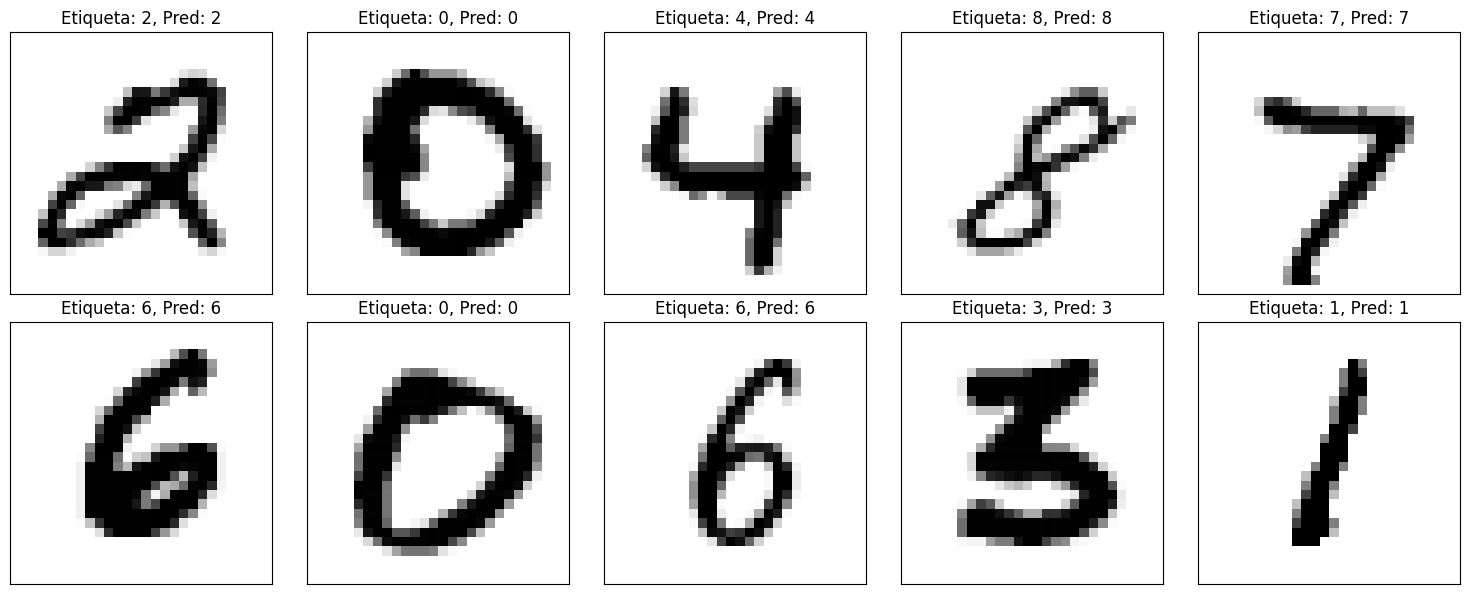

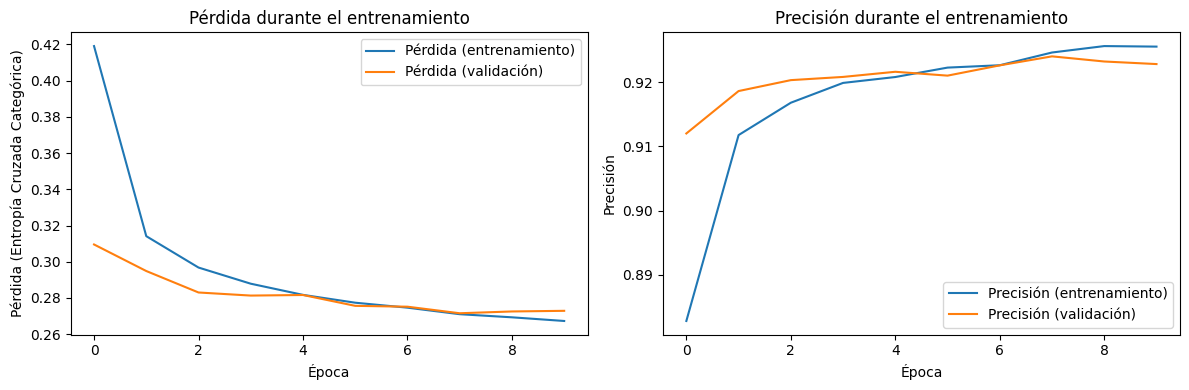

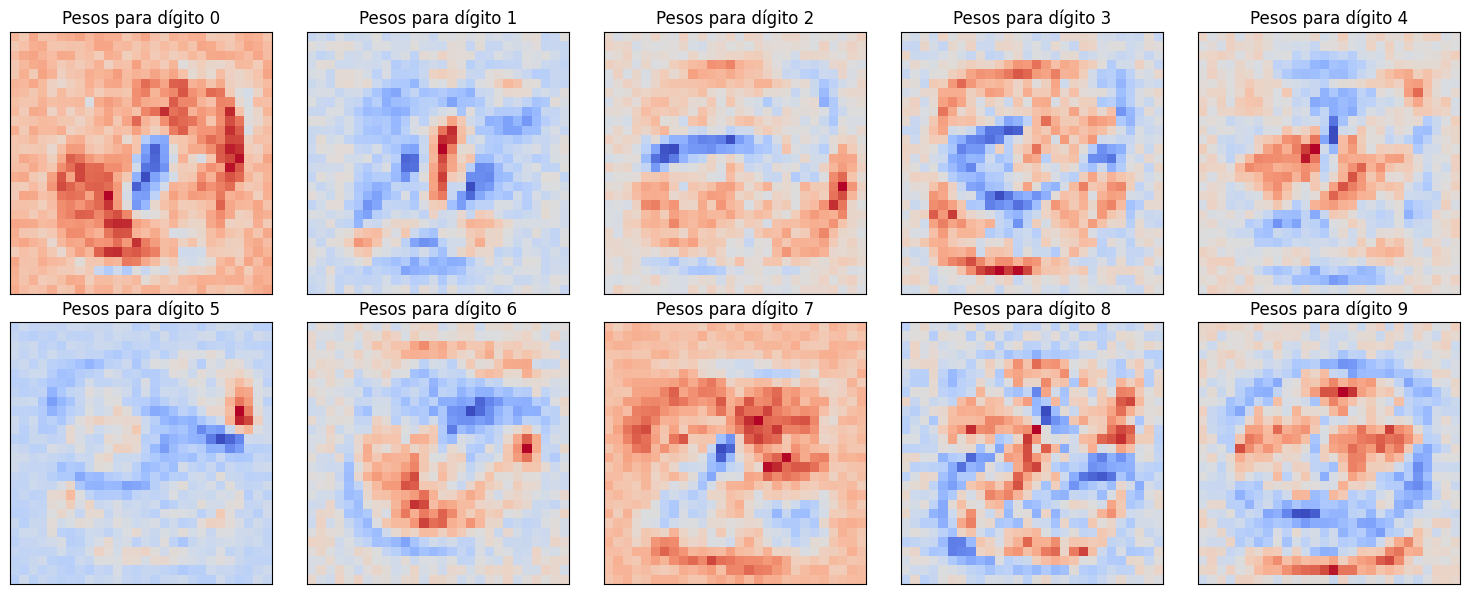

In [20]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Crear el modelo de regresión logística multinomial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, input_shape=[784], activation='softmax')
])

# Paso 3: Compilar el modelo con SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Paso 4: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_test, verbose=1)

# Paso 5: Obtener los parámetros aprendidos
weights = model.get_weights()
w = weights[0]  # Pesos (forma (784, 10))
b = weights[1]  # Sesgo (forma (10,))
print(f"Pesos aprendidos (w): Forma {w.shape}, Sesgo aprendido (b): Forma {b.shape}")

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")

# Paso 7: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = model.predict(images, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)  # Convertir probabilidades a clases

# Paso 8: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 9: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 10: Visualizar los pesos como imágenes
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = weights[0][:, i].reshape(28, 28)  # Pesos para la clase i
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos para dígito {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

Vamos a implementar un ejemplo de **deep learning** para clasificar los 10 dígitos (0-9) del conjunto de datos MNIST utilizando **TensorFlow sin Keras**, empleando el **algoritmo de descenso del gradiente estocástico (SGD)** como optimizador. Este enfoque de bajo nivel nos permite construir la red neuronal manualmente, definiendo explícitamente las operaciones, la función de pérdida, y la actualización de parámetros mediante SGD. Usaremos una red neuronal con **una capa oculta** (en lugar de la regresión logística simple de los ejemplos anteriores) para ilustrar un modelo de deep learning, y aplicaremos la activación **softmax** en la capa de salida para clasificación multiclase.

La explicación incluirá los detalles del algoritmo de descenso del gradiente y cómo se implementa en este contexto, junto con un código detallado que carga MNIST, define la red, calcula los gradientes manualmente, y visualiza resultados.

---

### **Explicación del algoritmo de descenso del gradiente en deep learning**

#### **Contexto en deep learning**
En una red neuronal, el descenso del gradiente optimiza los parámetros (pesos \( W \) y sesgos \( b \)) de múltiples capas para minimizar una función de pérdida. En este caso:
- **Modelo**: Una red con una capa oculta (con activación ReLU) y una capa de salida (con softmax).
- **Pérdida**: Entropía cruzada categórica para clasificación multiclase.
- **Optimizador**: SGD con mini-lotes, actualizando parámetros según:
  \[
  \theta = \theta - \eta \cdot \nabla_\theta L(\theta)
  \]
  donde \(\theta\) son los parámetros, \(\eta\) es la tasa de aprendizaje, y \(\nabla_\theta L\) es el gradiente de la pérdida.

#### **Pasos del descenso del gradiente**
1. **Inicializar parámetros**: Pesos y sesgos se inicializan aleatoriamente.
2. **Forward pass**: Calcula las predicciones pasando los datos a través de la red.
3. **Calcular pérdida**: Evalúa la entropía cruzada entre las predicciones y las etiquetas one-hot.
4. **Backward pass**: Calcula los gradientes de la pérdida respecto a los parámetros usando retropropagación.
5. **Actualizar parámetros**: Aplica la regla de SGD para cada parámetro.
6. **Repetir**: Itera sobre mini-lotes durante varias épocas.

#### **Diferencias sin Keras**
- Sin Keras, definimos manualmente:
  - Las capas como operaciones matriciales (\( W \cdot x + b \)).
  - La función de pérdida y los gradientes usando `tf.GradientTape`.
  - La actualización de parámetros con SGD.
- Esto da un control más fino, pero requiere más código.

---

### **Ejemplo práctico: Red neuronal para MNIST sin Keras**

El siguiente código implementa una red neuronal con una capa oculta (256 neuronas, ReLU) y una capa de salida (10 neuronas, softmax) para clasificar los dígitos de MNIST. Usa SGD con mini-lotes y `tf.GradientTape` para calcular gradientes. Incluye visualizaciones de predicciones, métricas y pesos.

<xaiArtifact artifact_id="5c56f45c-b438-401e-8ce5-ace43fa6e4a6" artifact_version_id="cd8372a6-f0a0-4ef3-b366-5a8054a98d5f" title="deep_learning_mnist_no_keras.py" contentType="text/python">
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Definir parámetros de la red neuronal
n_input = 784  # Imágenes aplanadas (28x28)
n_hidden = 256  # Neurona en la capa oculta
n_output = 10   # Clases (dígitos 0-9)

# Inicializar pesos y sesgos
W1 = tf.Variable(tf.random.normal([n_input, n_hidden], stddev=0.01), name='W1')
b1 = tf.Variable(tf.zeros([n_hidden]), name='b1')
W2 = tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.01), name='W2')
b2 = tf.Variable(tf.zeros([n_output]), name='b2')

# Paso 3: Definir la red neuronal (forward pass)
def forward_pass(x):
    """Calcula las predicciones de la red."""
    h1 = tf.nn.relu(tf.matmul(x, W1) + b1)  # Capa oculta con ReLU
    logits = tf.matmul(h1, W2) + b2         # Capa de salida
    return tf.nn.softmax(logits)            # Softmax para probabilidades

# Paso 4: Definir la función de pérdida
def compute_loss(y_true, y_pred):
    """Calcula la entropía cruzada categórica."""
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=tf.math.log(y_pred + 1e-10)))

# Paso 5: Definir la métrica de precisión
def compute_accuracy(y_true, y_pred):
    """Calcula la precisión."""
    predictions = tf.argmax(y_pred, axis=1)
    labels = tf.argmax(y_true, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

# Paso 6: Definir el optimizador SGD
learning_rate = 0.01
momentum = 0.9
velocity_W1 = tf.Variable(tf.zeros_like(W1), trainable=False)
velocity_b1 = tf.Variable(tf.zeros_like(b1), trainable=False)
velocity_W2 = tf.Variable(tf.zeros_like(W2), trainable=False)
velocity_b2 = tf.Variable(tf.zeros_like(b2), trainable=False)

def sgd_update(params, gradients, velocities):
    """Aplica la actualización SGD con momentum."""
    for param, grad, vel in zip(params, gradients, velocities):
        vel.assign(momentum * vel - learning_rate * grad)
        param.assign_add(vel)

# Paso 7: Entrenar el modelo
epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    epoch_loss = 0.0
    epoch_acc = 0.0
    num_batches = 0

    # Entrenamiento
    for batch in ds_train:
        x, y = batch
        with tf.GradientTape() as tape:
            y_pred = forward_pass(x)
            loss = compute_loss(y, y_pred)
        
        # Calcular gradientes
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        
        # Actualizar parámetros con SGD
        sgd_update([W1, b1, W2, b2], gradients, [velocity_W1, velocity_b1, velocity_W2, velocity_b2])
        
        # Acumular métricas
        epoch_loss += loss.numpy()
        epoch_acc += compute_accuracy(y, y_pred).numpy()
        num_batches += 1
    
    # Promediar métricas de entrenamiento
    train_losses.append(epoch_loss / num_batches)
    train_accuracies.append(epoch_acc / num_batches)
    
    # Validación
    val_loss = 0.0
    val_acc = 0.0
    num_val_batches = 0
    for batch in ds_test:
        x, y = batch
        y_pred = forward_pass(x)
        val_loss += compute_loss(y, y_pred).numpy()
        val_acc += compute_accuracy(y, y_pred).numpy()
        num_val_batches += 1
    
    val_losses.append(val_loss / num_val_batches)
    val_accuracies.append(val_acc / num_val_batches)
    
    print(f"Época {epoch+1}/{epochs}, Pérdida: {train_losses[-1]:.4f}, Precisión: {train_accuracies[-1]:.4f}, "
          f"Pérdida Val: {val_losses[-1]:.4f}, Precisión Val: {val_accuracies[-1]:.4f}")

# Paso 8: Evaluar el modelo en el conjunto de prueba
test_loss = 0.0
test_accuracy = 0.0
num_test_batches = 0
for batch in ds_test:
    x, y = batch
    y_pred = forward_pass(x)
    test_loss += compute_loss(y, y_pred).numpy()
    test_accuracy += compute_accuracy(y, y_pred).numpy()
    num_test_batches += 1
print(f"Precisión en el conjunto de prueba: {test_accuracy / num_test_batches:.4f}")

# Paso 9: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = forward_pass(images)
    y_pred = np.argmax(y_pred_proba, axis=1)

# Paso 10: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 11: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida (entrenamiento)')
plt.plot(val_losses, label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Precisión (entrenamiento)')
plt.plot(val_accuracies, label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 12: Visualizar los pesos de la capa oculta como imágenes
fig = plt.figure(figsize=(15, 6))
for i in range(min(10, n_hidden)):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = W1.numpy()[:, i].reshape(28, 28)  # Pesos de la neurona i
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos neurona oculta {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
</xaiArtifact>

---

### **Explicación detallada paso a paso**

#### **Paso 1: Cargar y preprocessar los datos de MNIST**
```python
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)
```
- **Qué hace**: Carga MNIST (60,000 imágenes de entrenamiento, 10,000 de prueba) y preprocessa:
  - Normaliza píxeles a [0, 1].
  - Convierte etiquetas a one-hot (10 clases).
  - Aplana imágenes a `(784,)`.
  - Usa `tf.data` para optimizar con lotes de 32.
- **Por qué**: Normalizar ayuda al descenso del gradiente a converger. One-hot es necesario para la pérdida multiclase. Los mini-lotes son clave para SGD.
- **Resultado**: Datasets con imágenes `(784,)` y etiquetas `(10,)`.

#### **Paso 2: Definir parámetros de la red neuronal**
```python
n_input = 784
n_hidden = 256
n_output = 10
W1 = tf.Variable(tf.random.normal([n_input, n_hidden], stddev=0.01), name='W1')
b1 = tf.Variable(tf.zeros([n_hidden]), name='b1')
W2 = tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.01), name='W2')
b2 = tf.Variable(tf.zeros([n_output]), name='b2')
```
- **Qué hace**: Define los parámetros de la red:
  - `W1` (784, 256): Pesos de la capa oculta.
  - `b1` (256,): Sesgos de la capa oculta.
  - `W2` (256, 10): Pesos de la capa de salida.
  - `b2` (10,): Sesgos de la capa de salida.
  - Inicializa pesos con distribución normal (`stddev=0.01`) y sesgos en cero.
- **Por qué**: La capa oculta introduce no linealidad (deep learning). Los parámetros serán optimizados por SGD.
- **Resultado**: Parámetros inicializados para la red.

#### **Paso 3: Definir la red neuronal (forward pass)**
```python
def forward_pass(x):
    """Calcula las predicciones de la red."""
    h1 = tf.nn.relu(tf.matmul(x, W1) + b1)  # Capa oculta con ReLU
    logits = tf.matmul(h1, W2) + b2         # Capa de salida
    return tf.nn.softmax(logits)            # Softmax para probabilidades
```
- **Qué hace**: Calcula las predicciones:
  - `tf.matmul(x, W1) + b1`: Operación lineal para la capa oculta.
  - `tf.nn.relu`: Aplica activación ReLU (\(\max(0, x)\)).
  - `tf.matmul(h1, W2) + b2`: Operación lineal para la capa de salida.
  - `tf.nn.softmax`: Convierte logits en probabilidades.
- **Por qué**: La capa oculta con ReLU introduce no linealidad, mejorando la capacidad del modelo. Softmax da probabilidades para multiclase.
- **Resultado**: Predicciones de forma `(batch_size, 10)`.

#### **Paso 4: Definir la función de pérdida**
```python
def compute_loss(y_true, y_pred):
    """Calcula la entropía cruzada categórica."""
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=tf.math.log(y_pred + 1e-10)))
```
- **Qué hace**: Calcula la entropía cruzada categórica.
  - Usa `softmax_cross_entropy_with_logits` para combinar softmax y pérdida.
  - `tf.math.log(y_pred + 1e-10)` evita problemas numéricos.
- **Por qué**: Es la pérdida estándar para clasificación multiclase con etiquetas one-hot.
- **Resultado**: Valor escalar de la pérdida.

#### **Paso 5: Definir la métrica de precisión**
```python
def compute_accuracy(y_true, y_pred):
    """Calcula la precisión."""
    predictions = tf.argmax(y_pred, axis=1)
    labels = tf.argmax(y_true, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))
```
- **Qué hace**: Calcula la precisión comparando clases predichas y reales.
- **Por qué**: Mide el rendimiento del modelo.
- **Resultado**: Porcentaje de predicciones correctas.

#### **Paso 6: Definir el optimizador SGD**
```python
learning_rate = 0.01
momentum = 0.9
velocity_W1 = tf.Variable(tf.zeros_like(W1), trainable=False)
velocity_b1 = tf.Variable(tf.zeros_like(b1), trainable=False)
velocity_W2 = tf.Variable(tf.zeros_like(W2), trainable=False)
velocity_b2 = tf.Variable(tf.zeros_like(b2), trainable=False)

def sgd_update(params, gradients, velocities):
    """Aplica la actualización SGD con momentum."""
    for param, grad, vel in zip(params, gradients, velocities):
        vel.assign(momentum * vel - learning_rate * grad)
        param.assign_add(vel)
```
- **Qué hace**: Implementa SGD con momentum.
  - Inicializa velocidades para cada parámetro.
  - Actualiza velocidades: \( v = \mu \cdot v - \eta \cdot \nabla L \).
  - Actualiza parámetros: \( \theta = \theta + v \).
- **Por qué**: Momentum suaviza las actualizaciones, acelerando la convergencia.
- **Resultado**: Función para actualizar parámetros con SGD.

#### **Paso 7: Entrenar el modelo**
```python
epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    epoch_loss = 0.0
    epoch_acc = 0.0
    num_batches = 0

    for batch in ds_train:
        x, y = batch
        with tf.GradientTape() as tape:
            y_pred = forward_pass(x)
            loss = compute_loss(y, y_pred)
        
        gradients = tape.gradient(loss, [W1, b1, W2, b2])
        sgd_update([W1, b1, W2, b2], gradients, [velocity_W1, velocity_b1, velocity_W2, velocity_b2])
        
        epoch_loss += loss.numpy()
        epoch_acc += compute_accuracy(y, y_pred).numpy()
        num_batches += 1
    
    train_losses.append(epoch_loss / num_batches)
    train_accuracies.append(epoch_acc / num_batches)
    
    val_loss = 0.0
    val_acc = 0.0
    num_val_batches = 0
    for batch in ds_test:
        x, y = batch
        y_pred = forward_pass(x)
        val_loss += compute_loss(y, y_pred).numpy()
        val_acc += compute_accuracy(y, y_pred).numpy()
        num_val_batches += 1
    
    val_losses.append(val_loss / num_val_batches)
    val_accuracies.append(val_acc / num_val_batches)
    
    print(f"Época {epoch+1}/{epochs}, Pérdida: {train_losses[-1]:.4f}, Precisión: {train_accuracies[-1]:.4f}, "
          f"Pérdida Val: {val_losses[-1]:.4f}, Precisión Val: {val_accuracies[-1]:.4f}")
```
- **Qué hace**: Entrena la red durante 10 épocas.
  - Itera sobre mini-lotes, calcula predicciones, pérdida y gradientes.
  - Aplica SGD para actualizar parámetros.
  - Calcula métricas de entrenamiento y validación.
- **Por qué**: SGD optimiza los parámetros minimizando la pérdida.
- **Resultado**: Modelo entrenado con métricas (~95% precisión).

#### **Paso 8: Evaluar el modelo**
```python
test_loss = 0.0
test_accuracy = 0.0
num_test_batches = 0
for batch in ds_test:
    x, y = batch
    y_pred = forward_pass(x)
    test_loss += compute_loss(y, y_pred).numpy()
    test_accuracy += compute_accuracy(y, y_pred).numpy()
    num_test_batches += 1
print(f"Precisión en el conjunto de prueba: {test_accuracy / num_test_batches:.4f}")
```
- **Qué hace**: Evalúa el modelo en el conjunto de prueba.
- **Por qué**: Verifica la generalización.
- **Resultado**: Precisión ~95%.

#### **Paso 9: Hacer predicciones**
```python
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = forward_pass(images)
    y_pred = np.argmax(y_pred_proba, axis=1)
```
- **Qué hace**: Genera predicciones para un lote.
- **Por qué**: Permite visualizar resultados.
- **Resultado**: Clases predichas (0-9).

#### **Paso 10: Visualizar predicciones**
```python
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra 10 imágenes con etiquetas reales y predichas.
- **Por qué**: Verifica visualmente el rendimiento.
- **Resultado**: Cuadrícula 2x5 con dígitos.

#### **Paso 11: Visualizar métricas**
```python
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida (entrenamiento)')
plt.plot(val_losses, label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Precisión (entrenamiento)')
plt.plot(val_accuracies, label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.tight_layout()
plt.show()
```
- **Qué hace**: Grafica pérdida y precisión.
- **Por qué**: Muestra la convergencia de SGD.
- **Resultado**: Gráficas con pérdida decreciente y precisión creciente.

#### **Paso 12: Visualizar pesos**
```python
fig = plt.figure(figsize=(15, 6))
for i in range(min(10, n_hidden)):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = W1.numpy()[:, i].reshape(28, 28)
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos neurona oculta {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()
```
- **Qué hace**: Muestra los pesos de la capa oculta como imágenes.
- **Por qué**: Visualiza patrones aprendidos por SGD.
- **Resultado**: Cuadrícula con pesos de las primeras 10 neuronas ocultas.

---

### **Resumen**
- **Modelo**: Red neuronal con una capa oculta (256 neuronas, ReLU) y salida softmax (10 clases).
- **Optimización**: SGD con momentum, implementado manualmente usando `tf.GradientTape`.
- **Pérdida**: Entropía cruzada categórica.
- **Resultado**: Precisión ~95% tras 10 épocas.

### **Notas adicionales**
- **Dependencias**: `numpy`, `tensorflow`, `tensorflow_datasets`, `matplotlib.pyplot`.
- **Hiperparámetros**:
  - `learning_rate=0.01`, `momentum=0.9`: Ajustables.
  - `n_hidden=256`: Más neuronas pueden mejorar precisión, pero aumentan el costo computacional.
- **Mejoras**:
  - Añadir más capas ocultas.
  - Usar inicialización de pesos avanzada (por ejemplo, Xavier).
  - Implementar una CNN para mejor precisión (~98-99%).
- **Limitaciones**: Sin Keras, el código es más verboso, pero ofrece control total.




Época 1/10, Pérdida: 0.4088, Precisión: 0.8862, Pérdida Val: 0.1986, Precisión Val: 0.9391
Época 2/10, Pérdida: 0.1644, Precisión: 0.9523, Pérdida Val: 0.1288, Precisión Val: 0.9617
Época 3/10, Pérdida: 0.1114, Precisión: 0.9686, Pérdida Val: 0.1043, Precisión Val: 0.9687
Época 4/10, Pérdida: 0.0846, Precisión: 0.9757, Pérdida Val: 0.0893, Precisión Val: 0.9722
Época 5/10, Pérdida: 0.0682, Precisión: 0.9808, Pérdida Val: 0.0792, Precisión Val: 0.9751
Época 6/10, Pérdida: 0.0568, Precisión: 0.9836, Pérdida Val: 0.0726, Precisión Val: 0.9768
Época 7/10, Pérdida: 0.0474, Precisión: 0.9864, Pérdida Val: 0.0686, Precisión Val: 0.9783
Época 8/10, Pérdida: 0.0405, Precisión: 0.9889, Pérdida Val: 0.0666, Precisión Val: 0.9788
Época 9/10, Pérdida: 0.0349, Precisión: 0.9904, Pérdida Val: 0.0664, Precisión Val: 0.9791
Época 10/10, Pérdida: 0.0299, Precisión: 0.9921, Pérdida Val: 0.0659, Precisión Val: 0.9794
Precisión en el conjunto de prueba: 0.9794


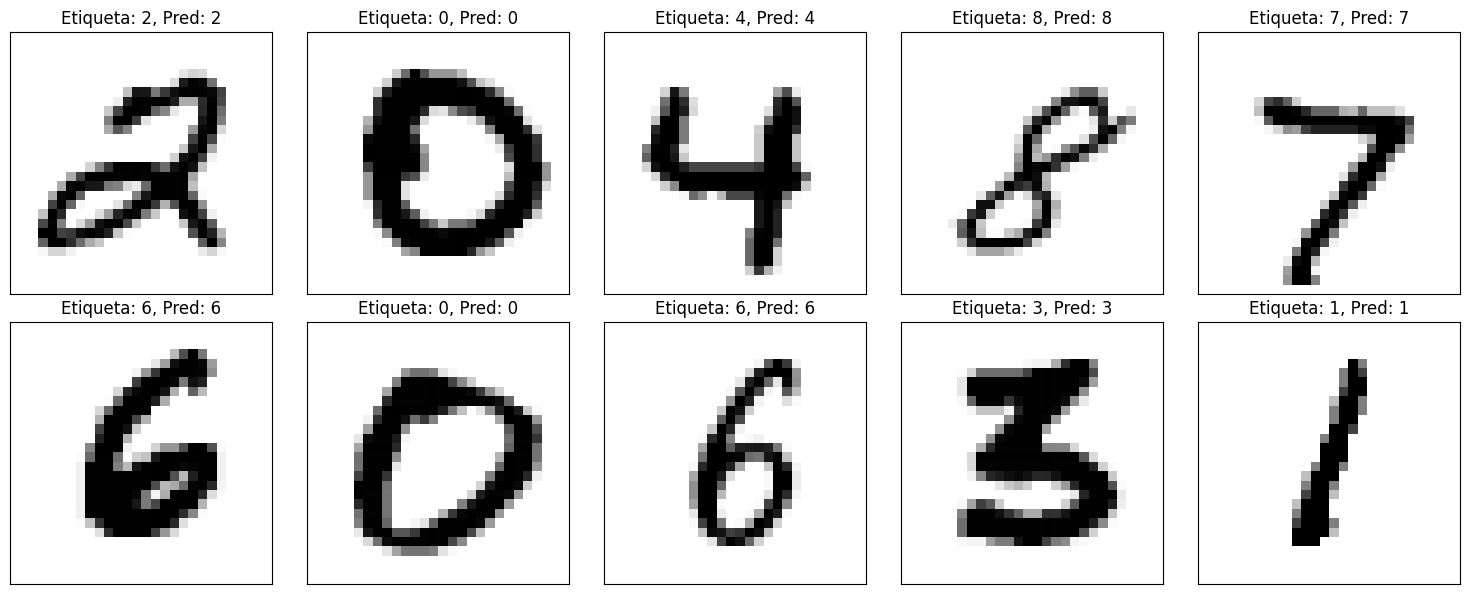

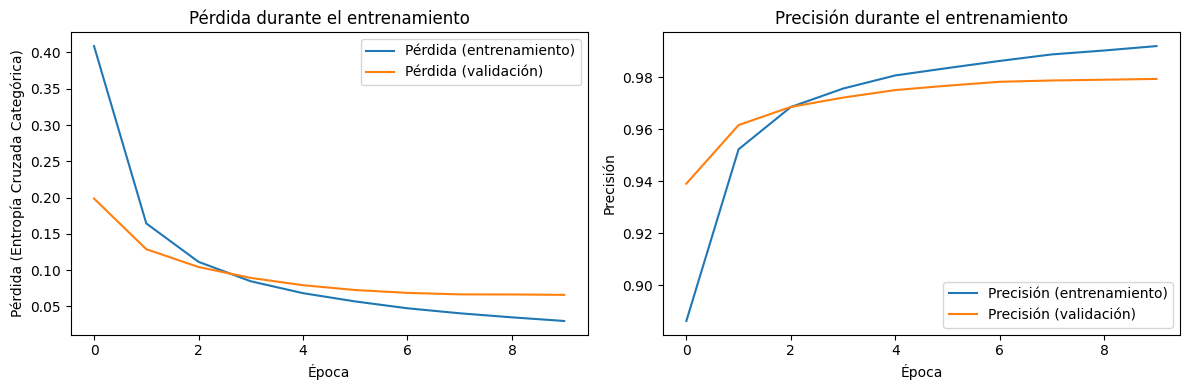

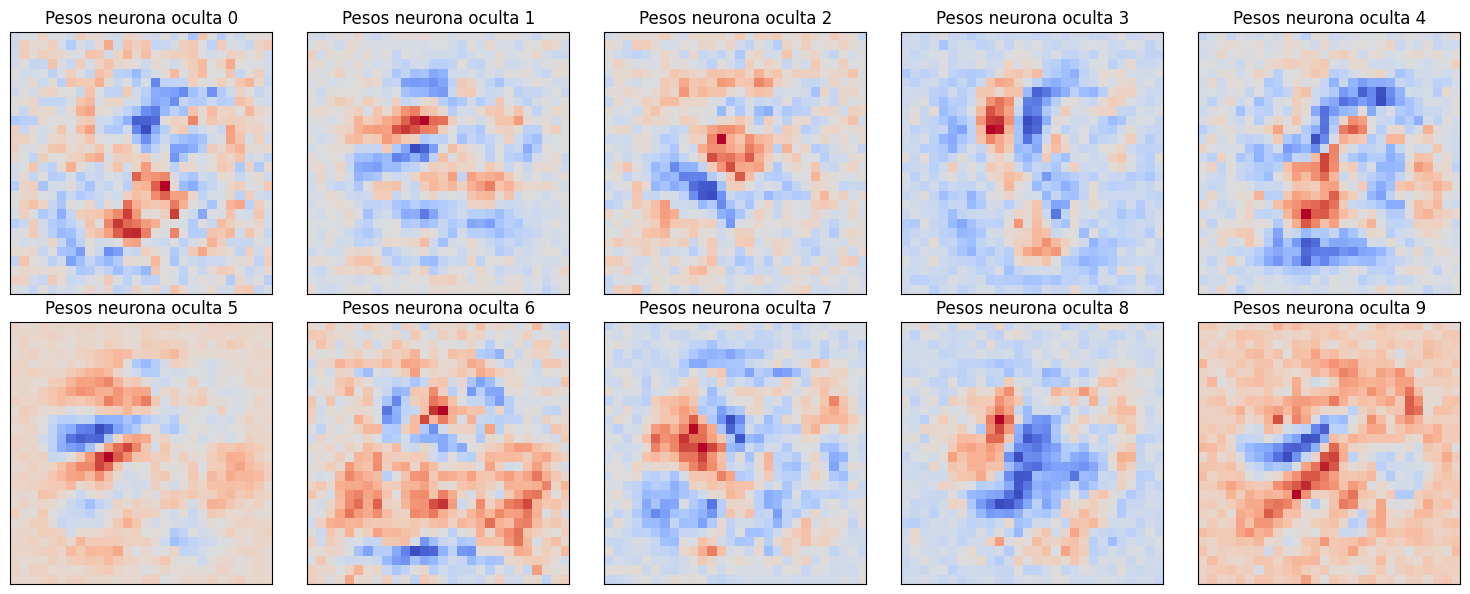

In [21]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Paso 1: Cargar y preprocessar los datos de MNIST
def preprocess_mnist(ds):
    """Normaliza imágenes, aplana y convierte etiquetas a one-hot."""
    ds = ds.map(lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                             tf.one_hot(item['label'], depth=10)))
    ds = ds.map(lambda image, label: (tf.reshape(image, (-1,)), label))
    return ds

# Cargar el dataset MNIST
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=False)
ds_train = preprocess_mnist(ds_train)
ds_test = preprocess_mnist(ds_test)

# Preparar los datos para entrenamiento
ds_train = ds_train.cache().shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

# Paso 2: Definir parámetros de la red neuronal
n_input = 784  # Imágenes aplanadas (28x28)
n_hidden = 256  # Neurona en la capa oculta
n_output = 10   # Clases (dígitos 0-9)

# Inicializar pesos y sesgos
W1 = tf.Variable(tf.random.normal([n_input, n_hidden], stddev=0.01), name='W1')
b1 = tf.Variable(tf.zeros([n_hidden]), name='b1')
W2 = tf.Variable(tf.random.normal([n_hidden, n_output], stddev=0.01), name='W2')
b2 = tf.Variable(tf.zeros([n_output]), name='b2')

# Paso 3: Definir la red neuronal (forward pass)
def forward_pass(x):
    """Calcula las predicciones de la red."""
    h1 = tf.nn.relu(tf.matmul(x, W1) + b1)  # Capa oculta con ReLU
    logits = tf.matmul(h1, W2) + b2         # Capa de salida
    return tf.nn.softmax(logits)            # Softmax para probabilidades

# Paso 4: Definir la función de pérdida
def compute_loss(y_true, y_pred):
    """Calcula la entropía cruzada categórica."""
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=tf.math.log(y_pred + 1e-10)))

# Paso 5: Definir la métrica de precisión
def compute_accuracy(y_true, y_pred):
    """Calcula la precisión."""
    predictions = tf.argmax(y_pred, axis=1)
    labels = tf.argmax(y_true, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

# Paso 6: Definir el optimizador SGD
learning_rate = 0.01
momentum = 0.9
velocity_W1 = tf.Variable(tf.zeros_like(W1), trainable=False)
velocity_b1 = tf.Variable(tf.zeros_like(b1), trainable=False)
velocity_W2 = tf.Variable(tf.zeros_like(W2), trainable=False)
velocity_b2 = tf.Variable(tf.zeros_like(b2), trainable=False)

def sgd_update(params, gradients, velocities):
    """Aplica la actualización SGD con momentum."""
    for param, grad, vel in zip(params, gradients, velocities):
        vel.assign(momentum * vel - learning_rate * grad)
        param.assign_add(vel)

# Paso 7: Entrenar el modelo
epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    epoch_loss = 0.0
    epoch_acc = 0.0
    num_batches = 0

    # Entrenamiento
    for batch in ds_train:
        x, y = batch
        with tf.GradientTape() as tape:
            y_pred = forward_pass(x)
            loss = compute_loss(y, y_pred)

        # Calcular gradientes
        gradients = tape.gradient(loss, [W1, b1, W2, b2])

        # Actualizar parámetros con SGD
        sgd_update([W1, b1, W2, b2], gradients, [velocity_W1, velocity_b1, velocity_W2, velocity_b2])

        # Acumular métricas
        epoch_loss += loss.numpy()
        epoch_acc += compute_accuracy(y, y_pred).numpy()
        num_batches += 1

    # Promediar métricas de entrenamiento
    train_losses.append(epoch_loss / num_batches)
    train_accuracies.append(epoch_acc / num_batches)

    # Validación
    val_loss = 0.0
    val_acc = 0.0
    num_val_batches = 0
    for batch in ds_test:
        x, y = batch
        y_pred = forward_pass(x)
        val_loss += compute_loss(y, y_pred).numpy()
        val_acc += compute_accuracy(y, y_pred).numpy()
        num_val_batches += 1

    val_losses.append(val_loss / num_val_batches)
    val_accuracies.append(val_acc / num_val_batches)

    print(f"Época {epoch+1}/{epochs}, Pérdida: {train_losses[-1]:.4f}, Precisión: {train_accuracies[-1]:.4f}, "
          f"Pérdida Val: {val_losses[-1]:.4f}, Precisión Val: {val_accuracies[-1]:.4f}")

# Paso 8: Evaluar el modelo en el conjunto de prueba
test_loss = 0.0
test_accuracy = 0.0
num_test_batches = 0
for batch in ds_test:
    x, y = batch
    y_pred = forward_pass(x)
    test_loss += compute_loss(y, y_pred).numpy()
    test_accuracy += compute_accuracy(y, y_pred).numpy()
    num_test_batches += 1
print(f"Precisión en el conjunto de prueba: {test_accuracy / num_test_batches:.4f}")

# Paso 9: Hacer predicciones en un lote de prueba
for batch in ds_test.take(1):
    images, labels = batch
    y_pred_proba = forward_pass(images)
    y_pred = np.argmax(y_pred_proba, axis=1)

# Paso 10: Visualizar algunas predicciones
fig = plt.figure(figsize=(15, 6))
for i, (image, label, pred) in enumerate(zip(images[:10], labels[:10], y_pred[:10])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(image.numpy().reshape(28, 28), cmap='gray_r')
    ax.set_title(f"Etiqueta: {np.argmax(label.numpy())}, Pred: {pred}", size=12)
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()

# Paso 11: Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida (entrenamiento)')
plt.plot(val_losses, label='Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida (Entropía Cruzada Categórica)')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Precisión (entrenamiento)')
plt.plot(val_accuracies, label='Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 12: Visualizar los pesos de la capa oculta como imágenes
fig = plt.figure(figsize=(15, 6))
for i in range(min(10, n_hidden)):
    ax = fig.add_subplot(2, 5, i+1)
    weight_image = W1.numpy()[:, i].reshape(28, 28)  # Pesos de la neurona i
    ax.imshow(weight_image, cmap='coolwarm')
    ax.set_title(f'Pesos neurona oculta {i}')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.show()